In [1]:
import os
import pandas as pd
import datetime
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

In [2]:
DATA_SOURCE = "C:/Users/sbranchett/Data/WiFi_data"
ACCESS_POINT = os.path.join(DATA_SOURCE, "WiFiAccessPoint.csv")

In [3]:
def load_wifi_data(interesting_columns, path=ACCESS_POINT):
    raw_data = pd.read_csv(path, delimiter=",")
    raw_data = raw_data.rename(columns=lambda x: x.strip())
    return raw_data[interesting_columns]

interesting_columns = ["timestamp", "id", "clientCount", "locationHierarchy"]
all_data = load_wifi_data(interesting_columns)

In [4]:
all_data["building"] = all_data["locationHierarchy"].str.split(" > ",expand=True)[1]
all_data["time_bucket"] = all_data["timestamp"].apply(lambda d: 300000*int(d/300000))
print(all_data)

             timestamp           id  clientCount  \
0        1620991804452    119942019            0   
1        1620991804452    119942021            0   
2        1620991804453    119942023            0   
3        1620991804453    119942025            0   
4        1620991804453    119942027            0   
...                ...          ...          ...   
5494085  1621608617172  21431122764            0   
5494086  1621608617172  21431122766            0   
5494087  1621608617172  21431122768            0   
5494088  1621608617172  21431122770            0   
5494089  1621608617173  21431122772            0   

                             locationHierarchy   building    time_bucket  
0            TUDelft > 31-TBM > 3e Verdieping      31-TBM  1620991800000  
1            TUDelft > 31-TBM > 3e Verdieping      31-TBM  1620991800000  
2            TUDelft > 31-TBM > 4e Verdieping      31-TBM  1620991800000  
3            TUDelft > 31-TBM > 2e Verdieping      31-TBM  1620991800000  


## find all the IO wifi points

In [5]:
IO_all = all_data.loc[all_data["building"] == "32-OCP-IO"]
print(IO_all)

             timestamp           id  clientCount  \
140      1620991804482    791720187            0   
141      1620991804482    791720189            0   
142      1620991804482    791720191            0   
143      1620991804482    791720193            2   
144      1620991804483    791720195            0   
...                ...          ...          ...   
5493785  1621608617115   8380855495            0   
5493786  1621608617116   8380855497            0   
5493943  1621608617145  13017372373            7   
5493946  1621608617146  13017372381            0   
5493959  1621608617148  13507694223            0   

                                locationHierarchy   building    time_bucket  
140          TUDelft > 32-OCP-IO > 4e Verdieping   32-OCP-IO  1620991800000  
141          TUDelft > 32-OCP-IO > 4e Verdieping   32-OCP-IO  1620991800000  
142          TUDelft > 32-OCP-IO > 4e Verdieping   32-OCP-IO  1620991800000  
143          TUDelft > 32-OCP-IO > 4e Verdieping   32-OCP-IO  1

## how many wifi points at IO?

In [6]:
IO_wifi_points = IO_all["id"].value_counts()
print(type(IO_wifi_points))
print(len(IO_wifi_points))
print(IO_wifi_points)

<class 'pandas.core.series.Series'>
143
791720215     2057
791720355     2057
791720381     2057
791720379     2057
791720377     2057
              ... 
791720265     2057
791720311     2057
6945655720    2057
791720309     2057
8380855497    2057
Name: id, Length: 143, dtype: int64


791720215


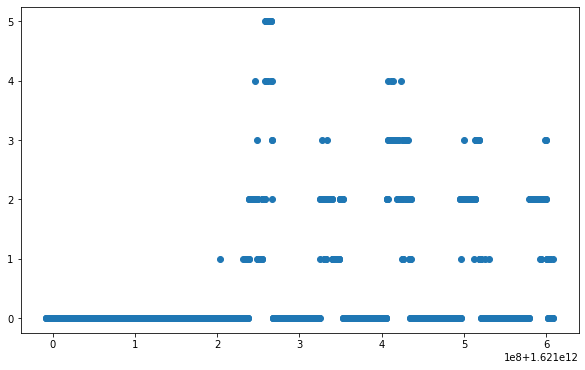

791720355


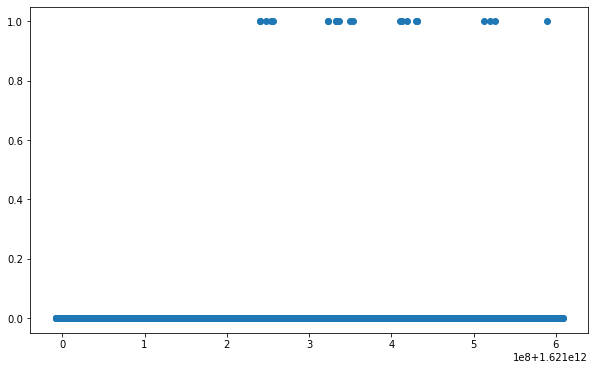

791720381


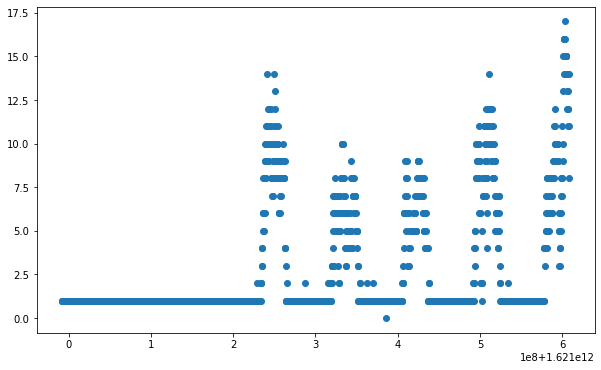

791720379


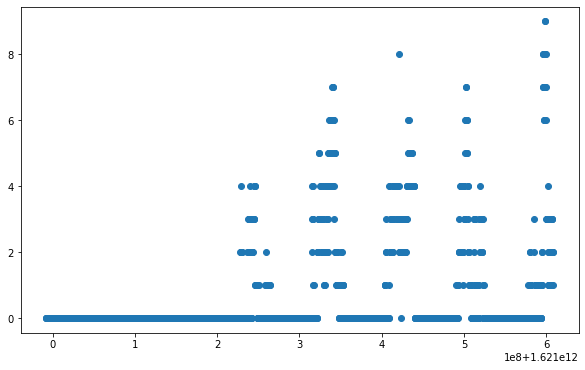

791720377


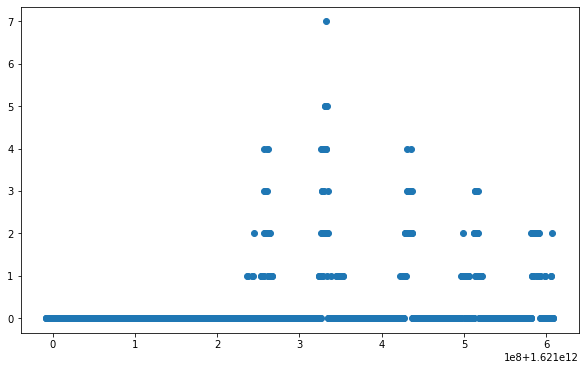

791720359


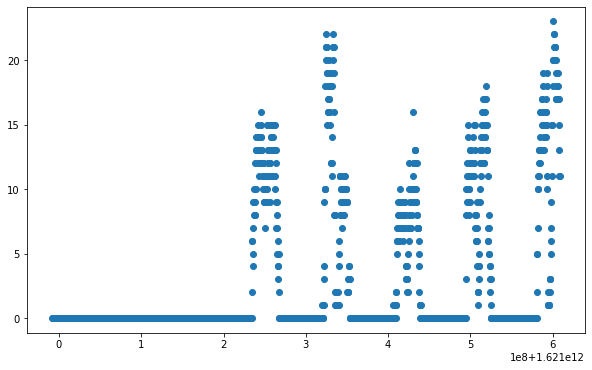

791720357


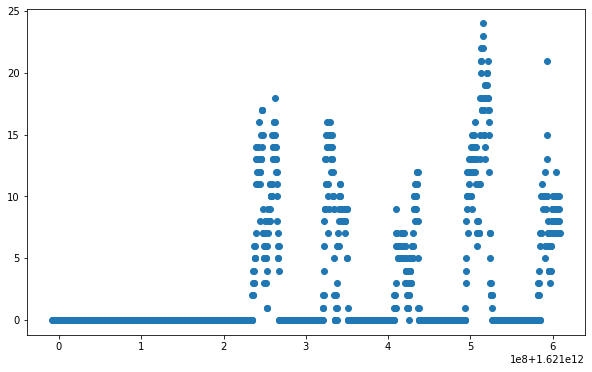

3843263429


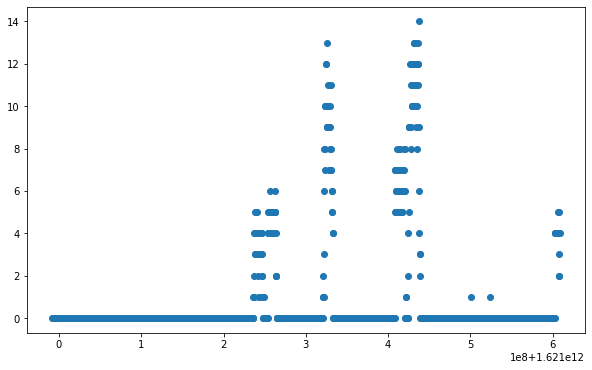

791720353


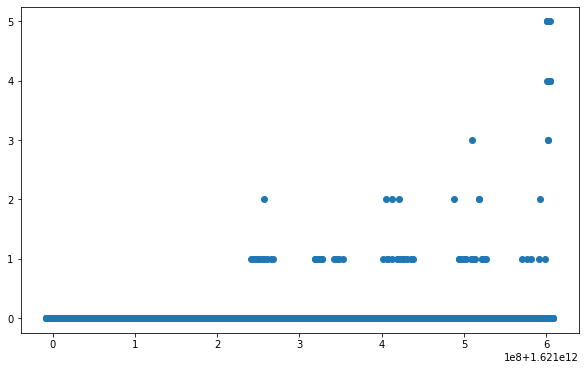

791720369


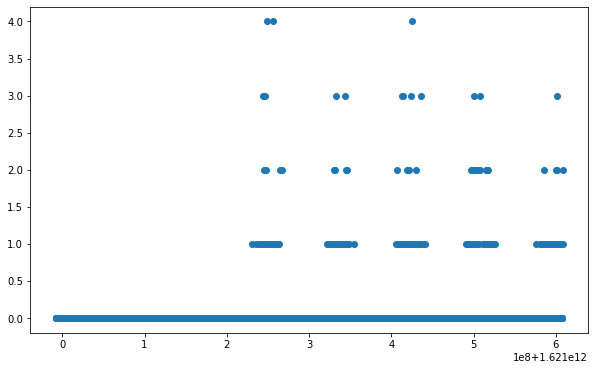

791720367


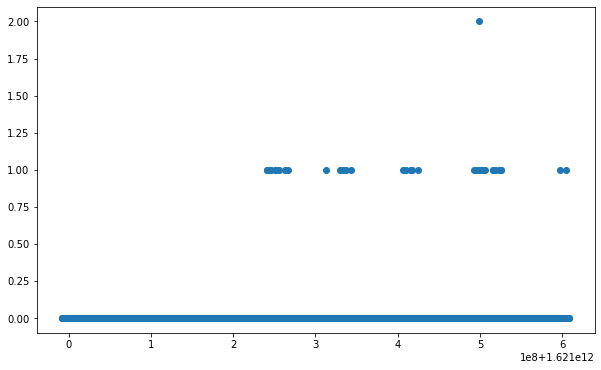

791720365


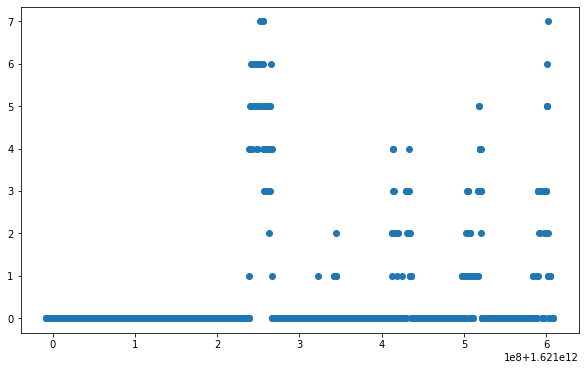

791720363


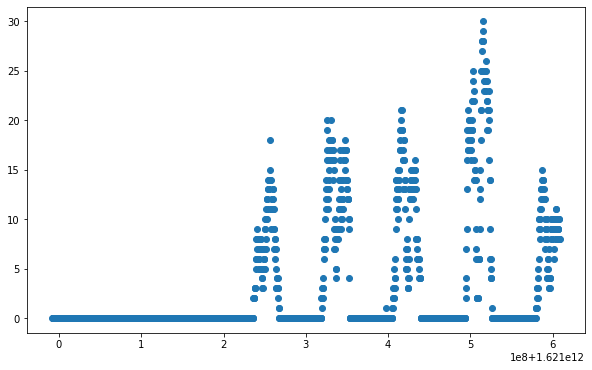

3843263692


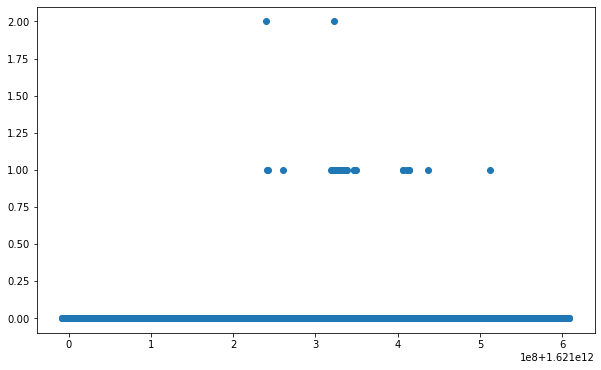

791720361


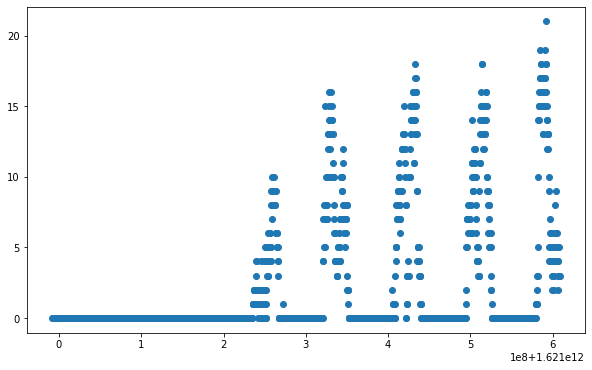

7942320391


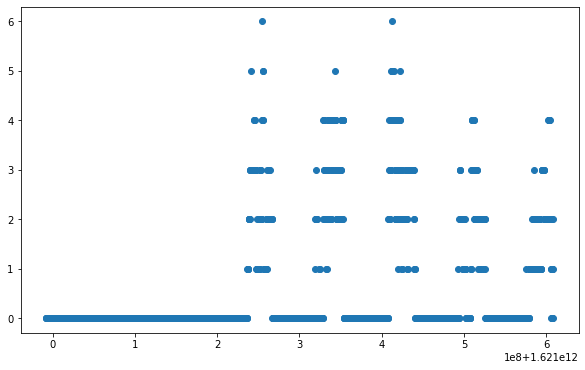

791720383


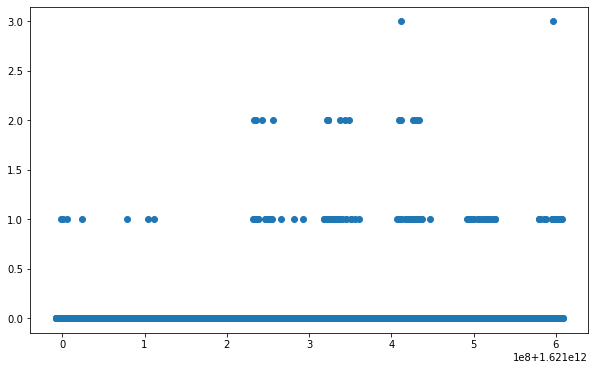

2767744171


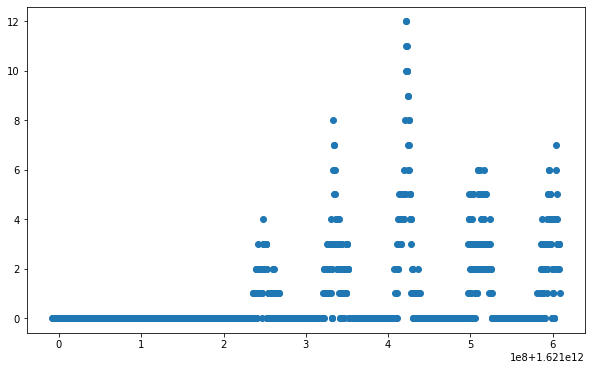

791720405


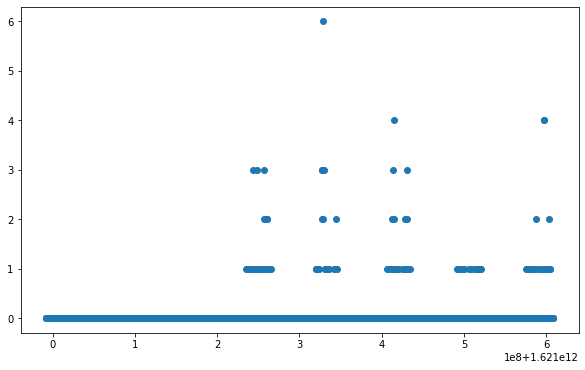

791720323


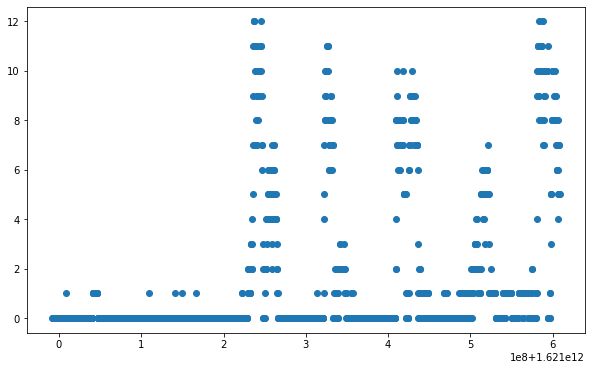

791720349


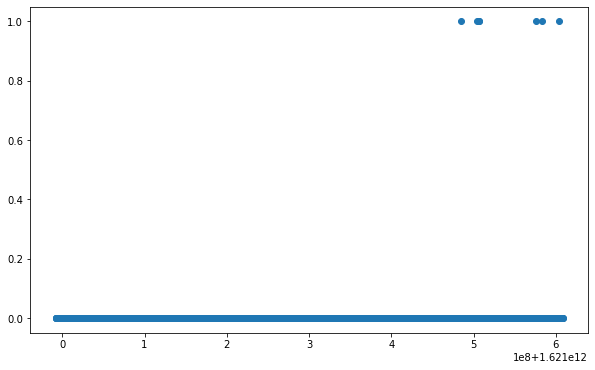

791720347


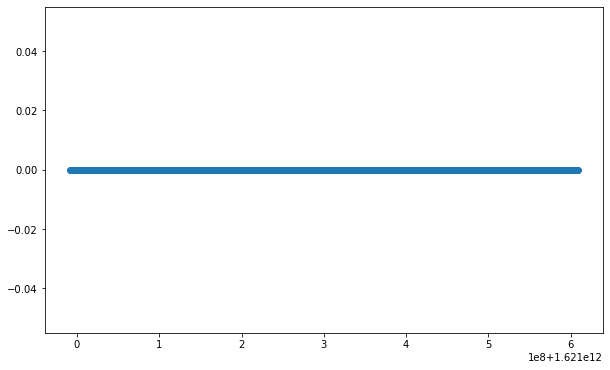

791720345


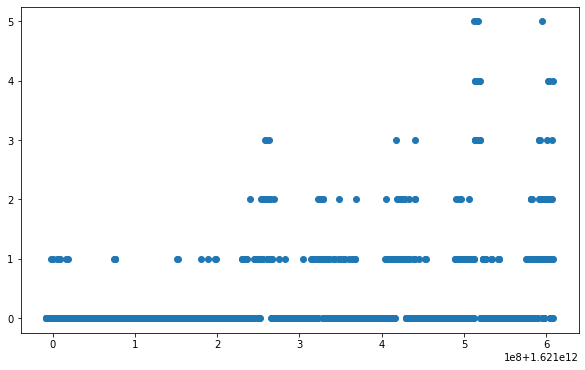

1456660684


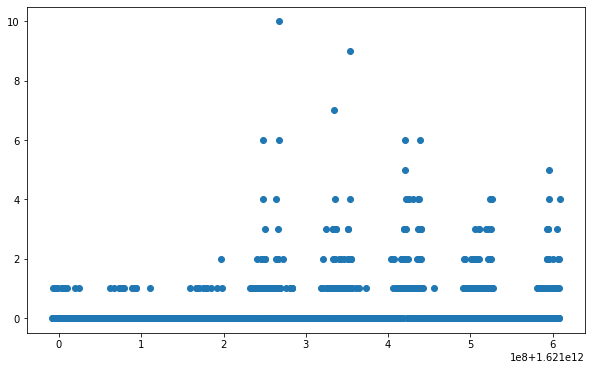

791720327


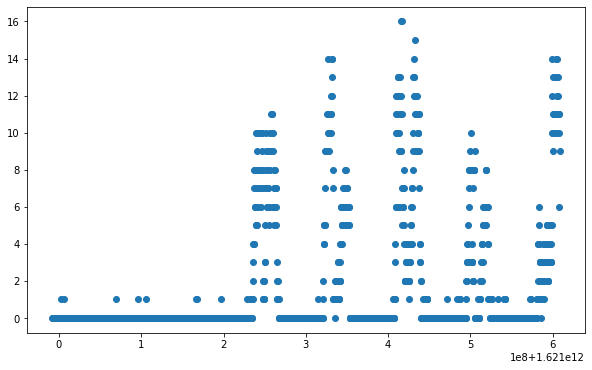

791720325


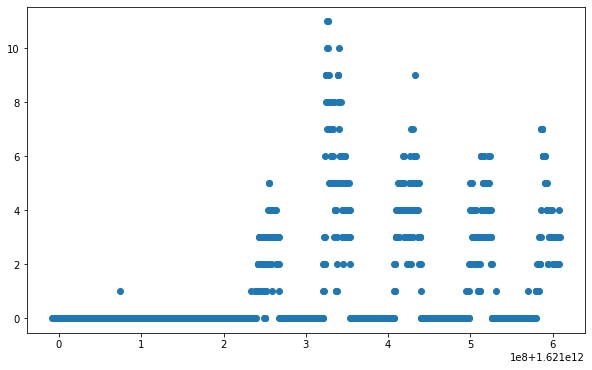

791720321


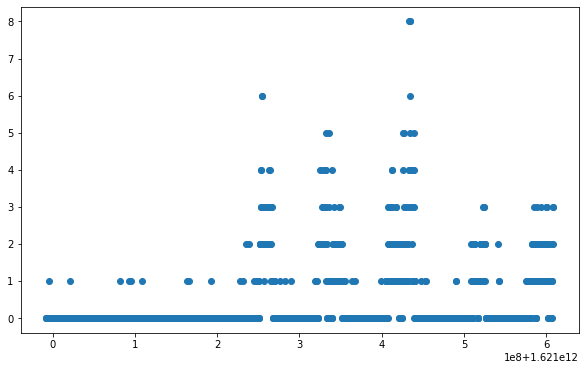

791720371


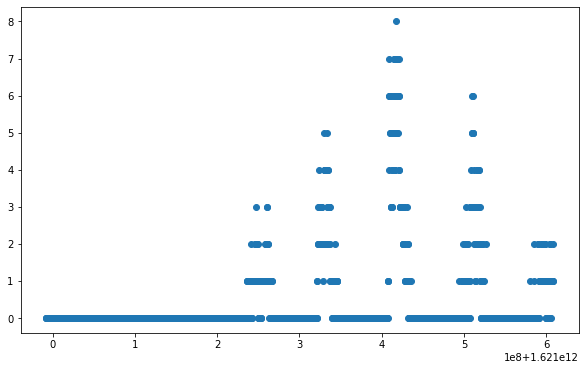

791720335


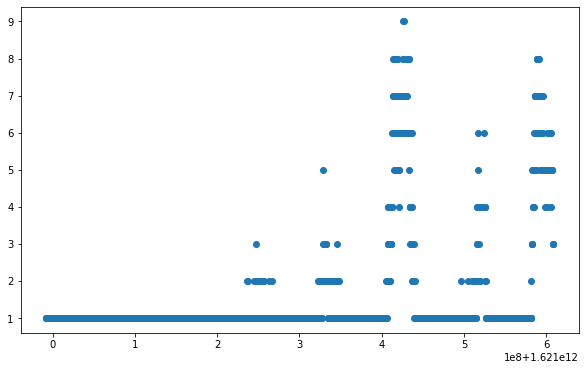

791720333


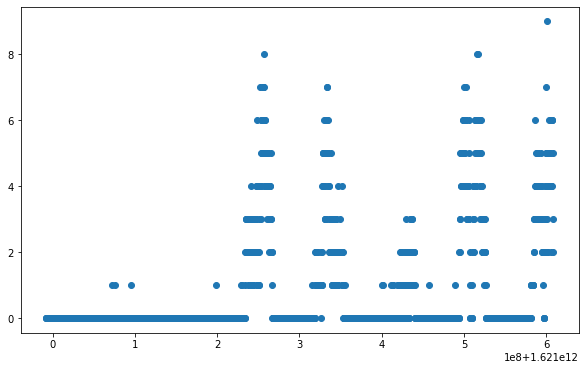

791720331


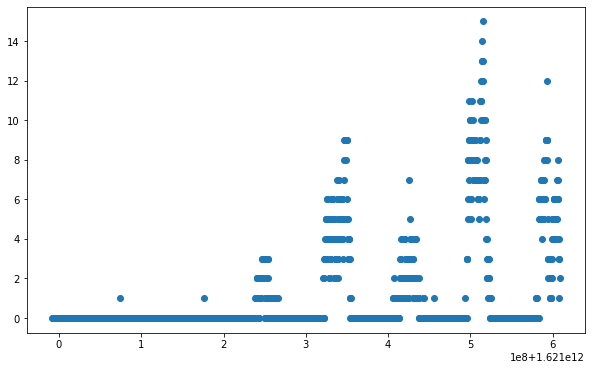

791720329


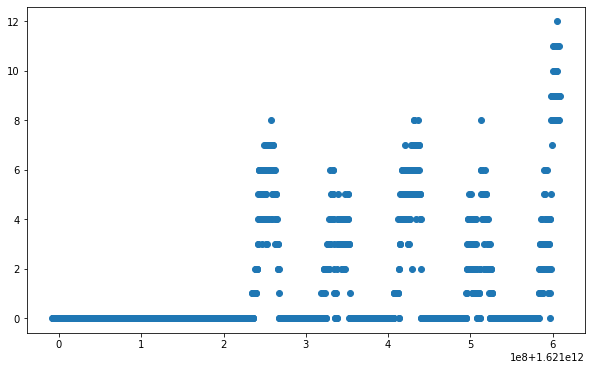

791720375


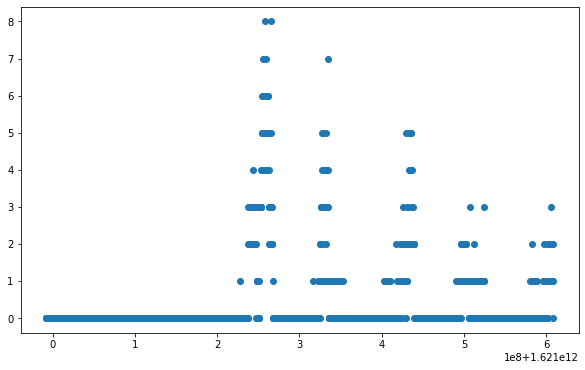

791720373


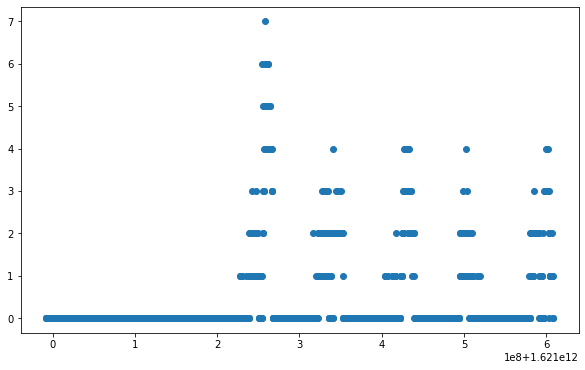

791720407


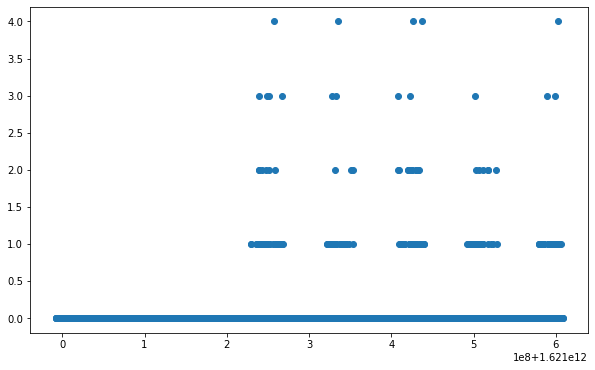

791720403


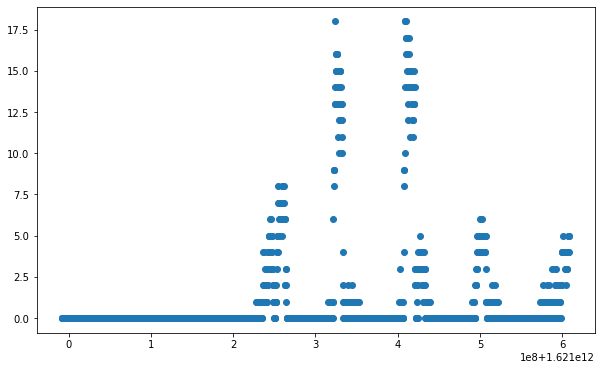

791720337


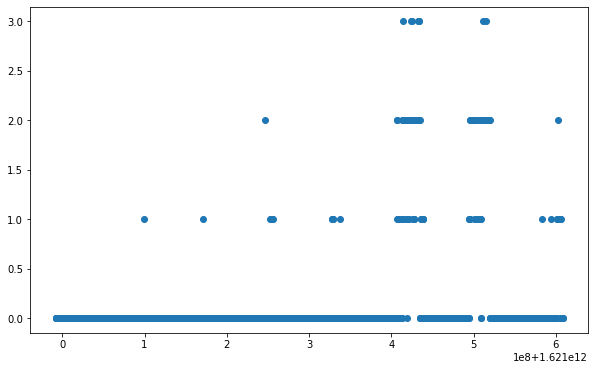

8380855495


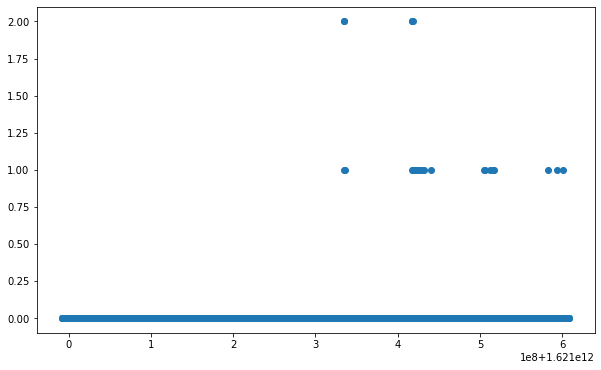

791720189


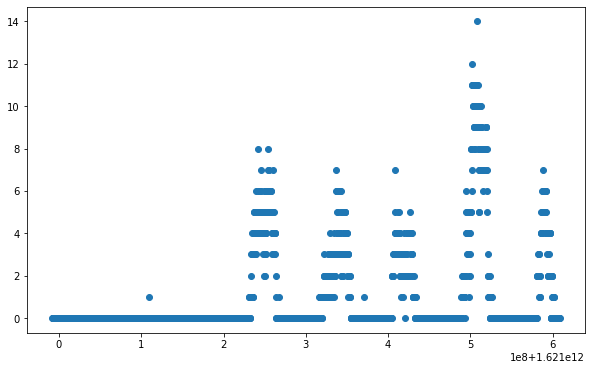

791720445


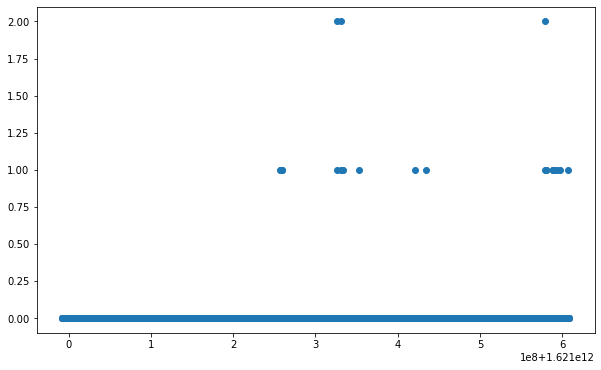

791720187


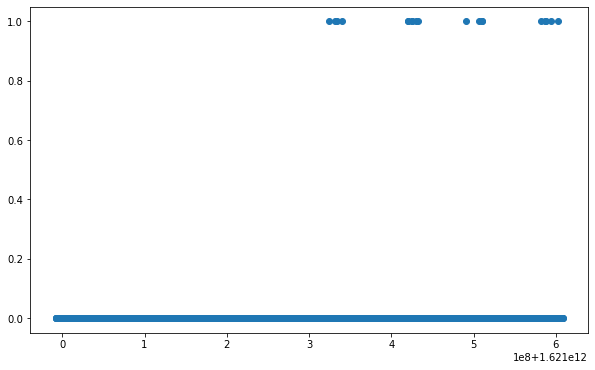

791720443


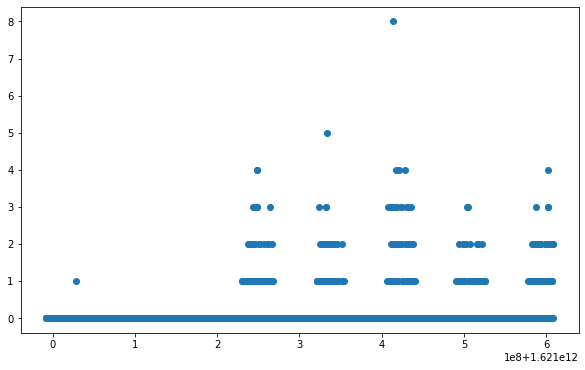

791720441


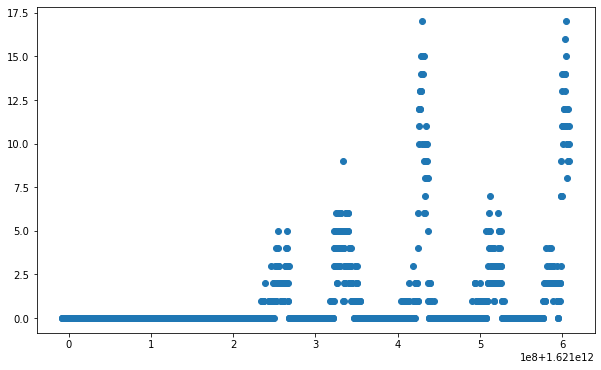

791720423


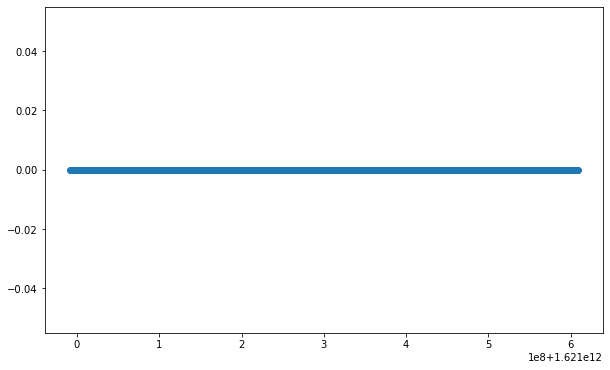

791720421


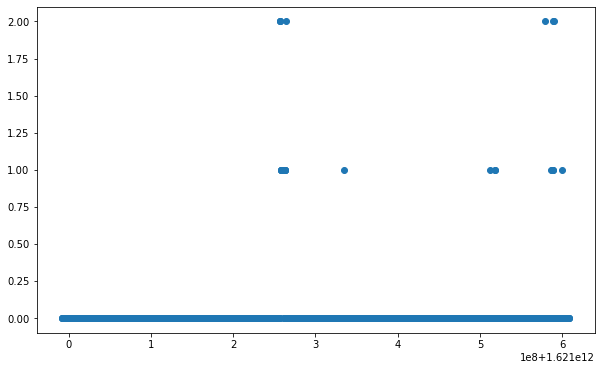

791720191


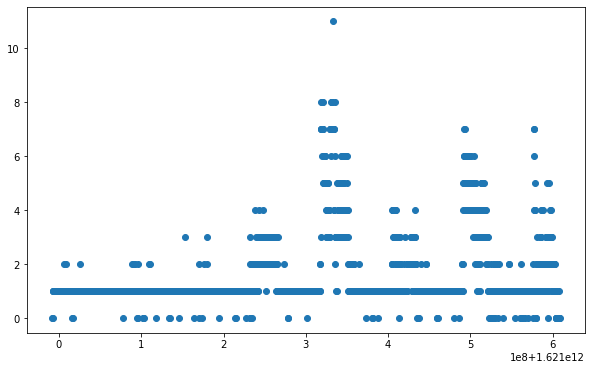

791720419


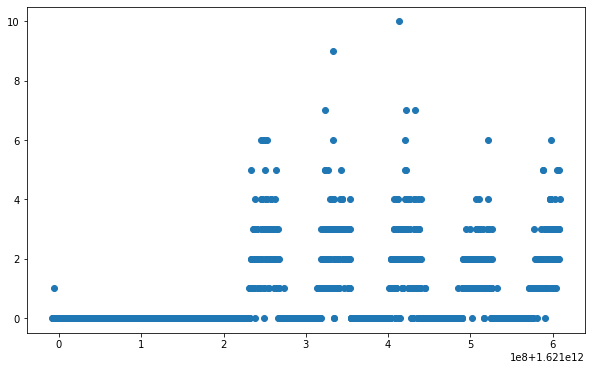

791720417


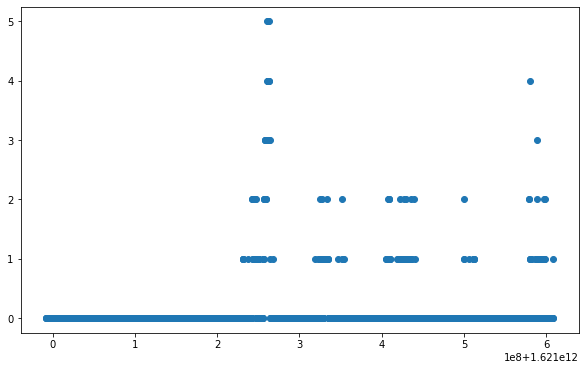

791720431


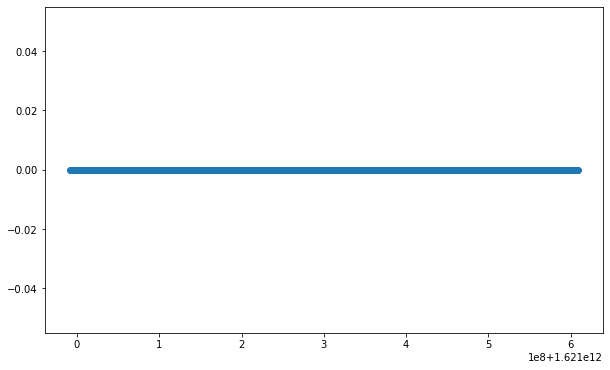

791720429


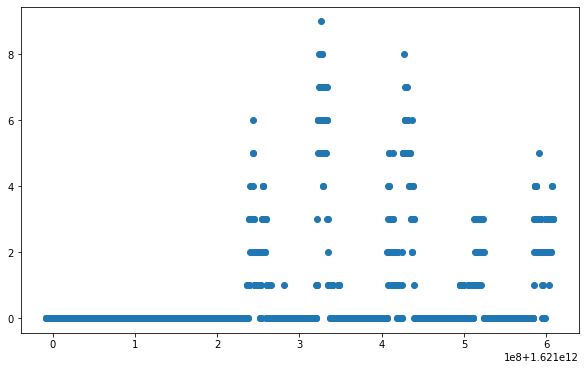

791720427


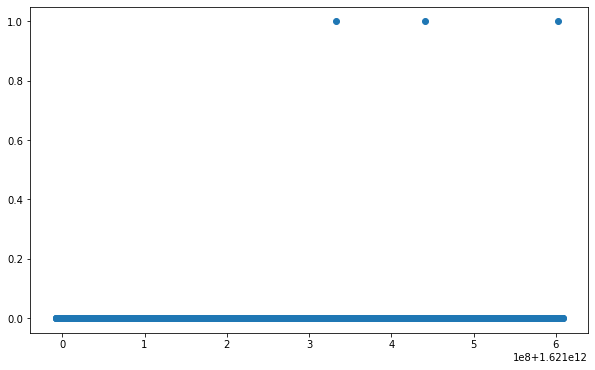

791720425


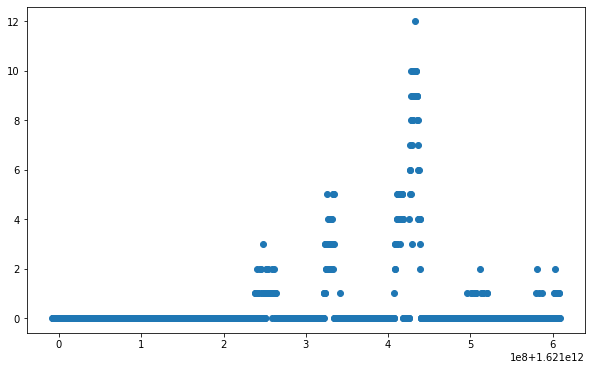

791720447


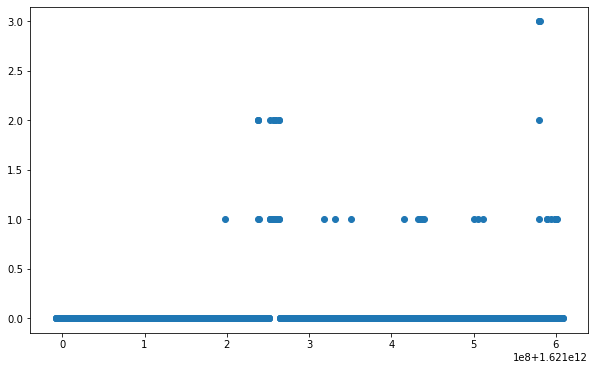

791720433


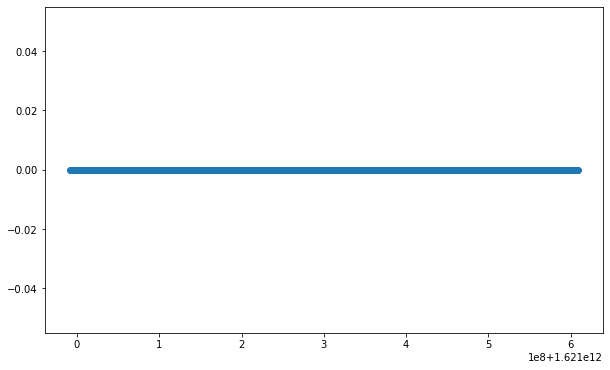

791720401


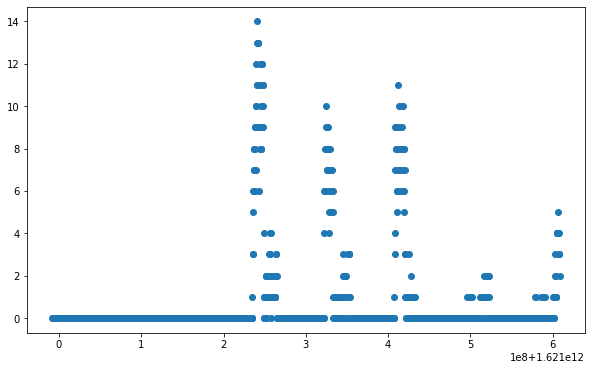

791720387


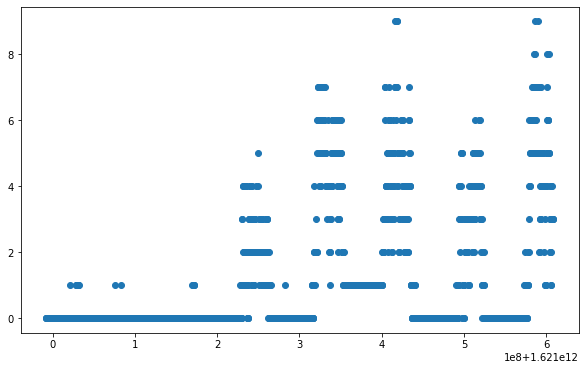

791720415


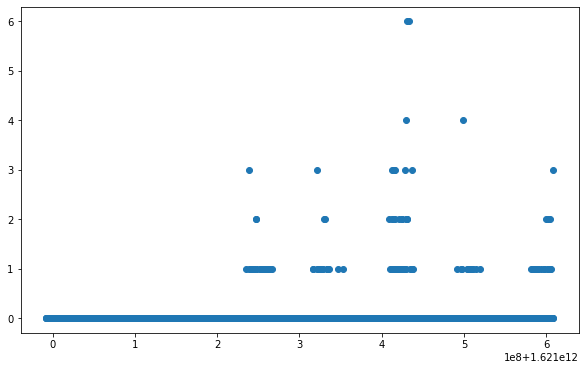

791720413


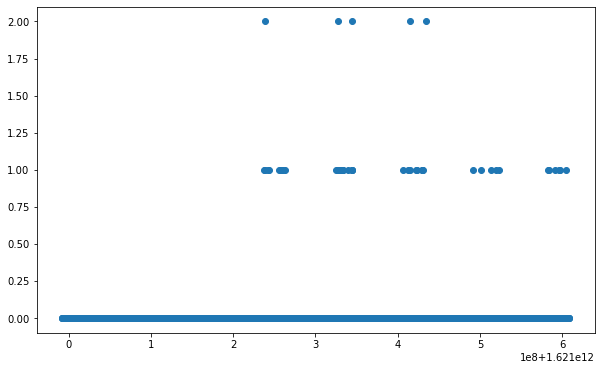

791720411


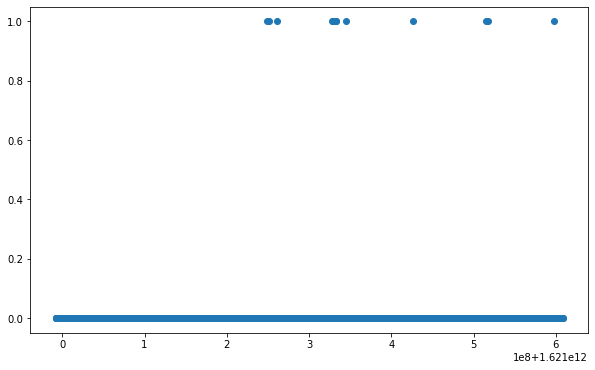

791720409


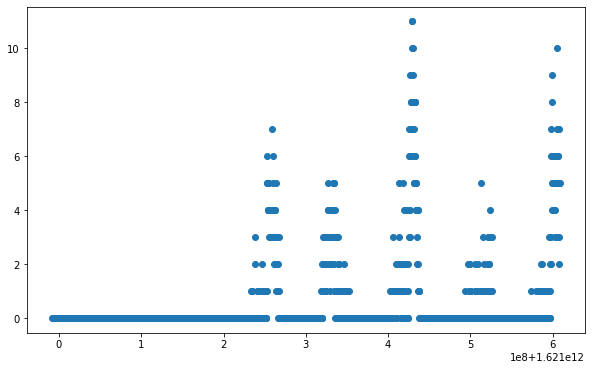

791720391


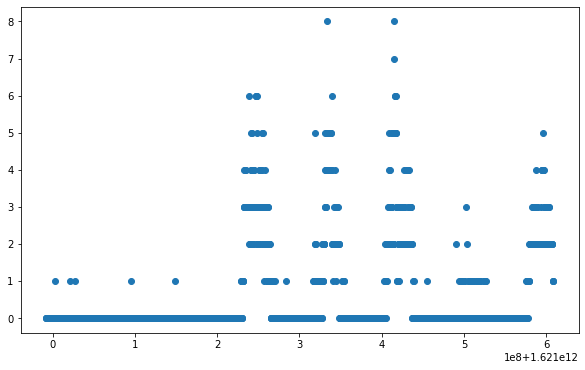

791720389


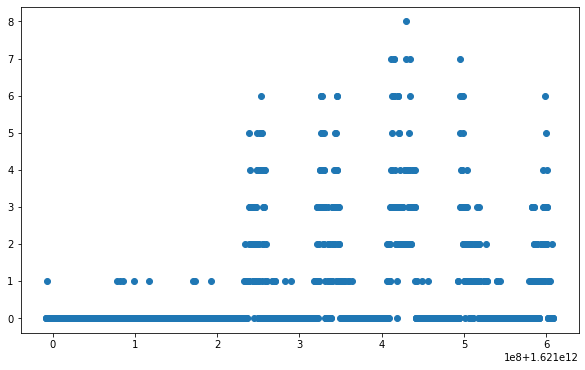

791720385


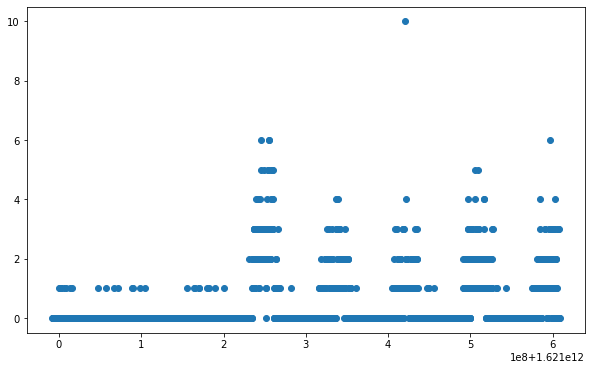

791720435


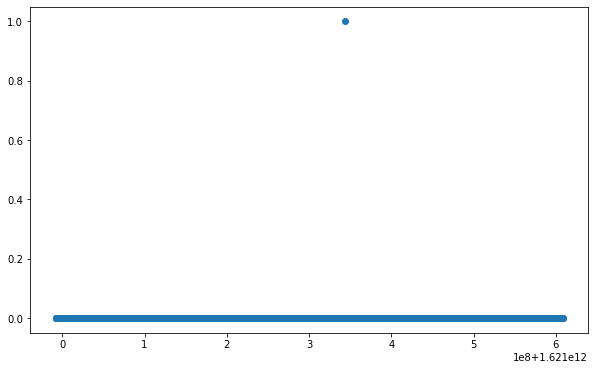

791720399


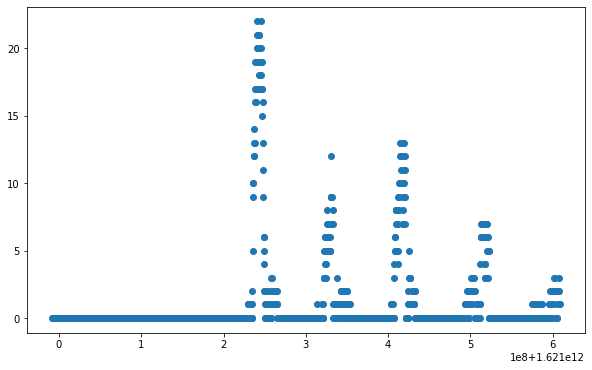

791720397


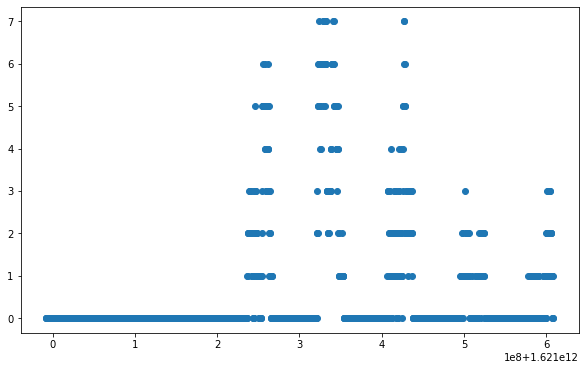

791720395


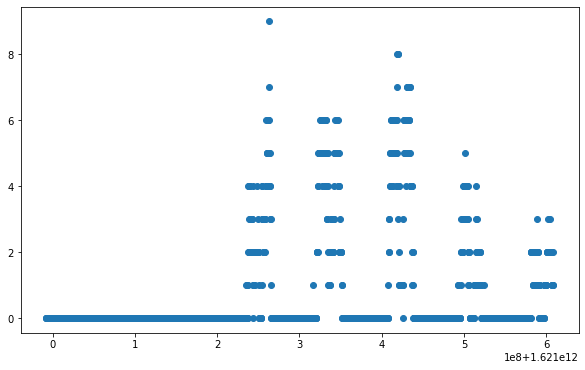

791720393


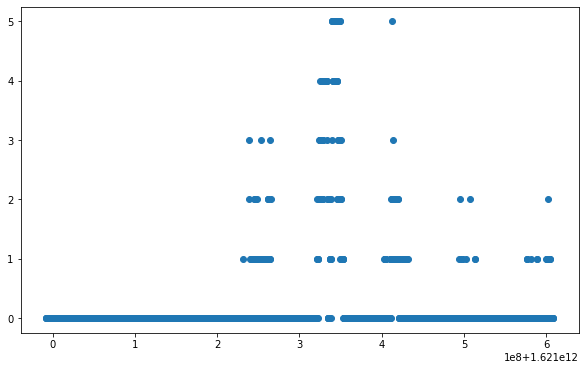

791720439


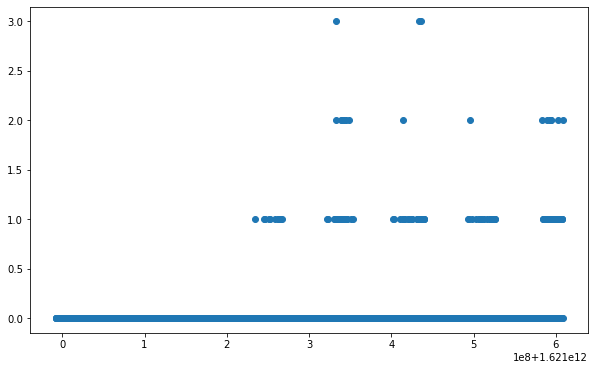

791720437


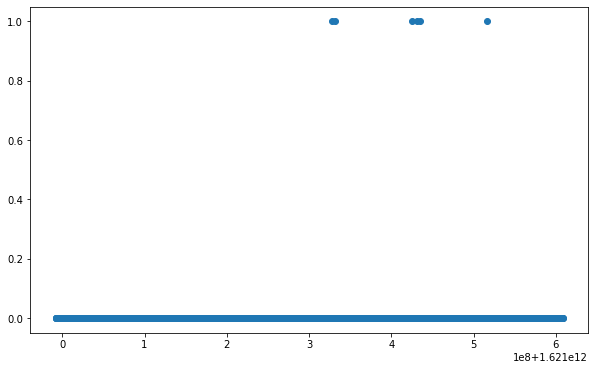

791720351


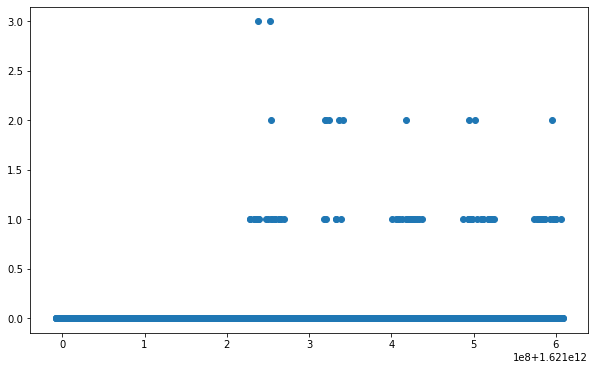

791720339


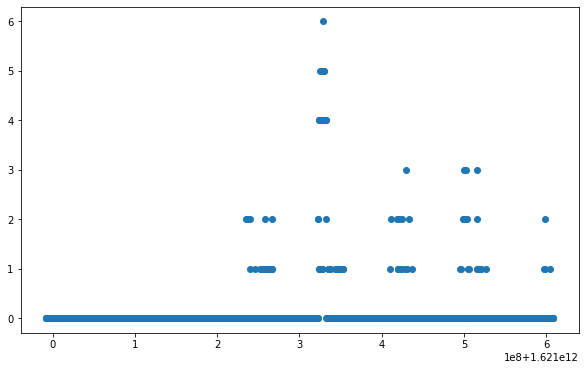

791720213


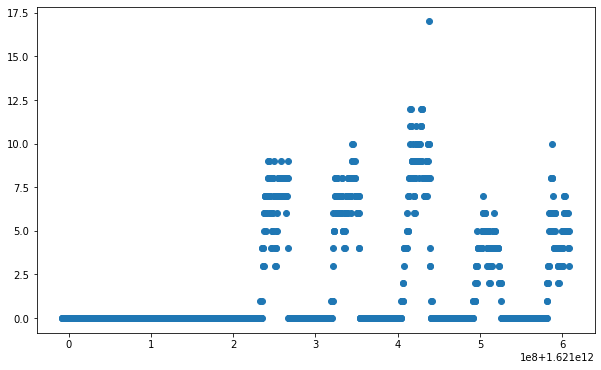

791720241


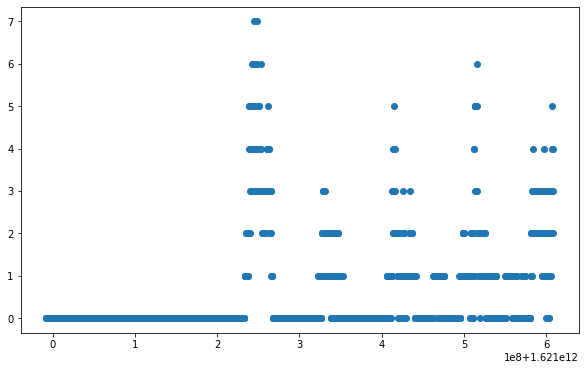

791720203


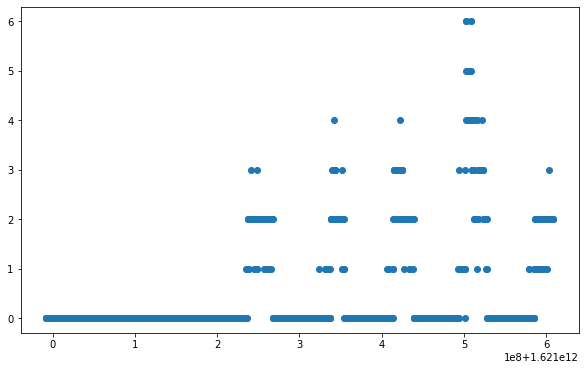

791720459


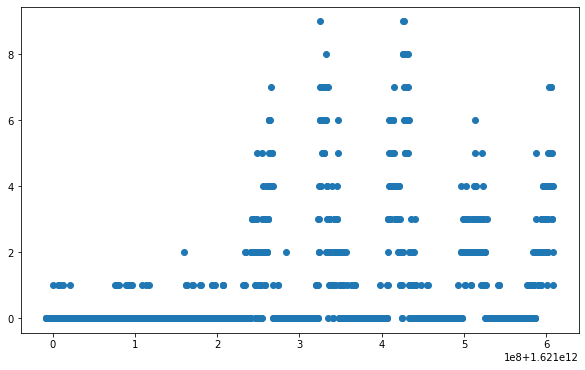

791720457


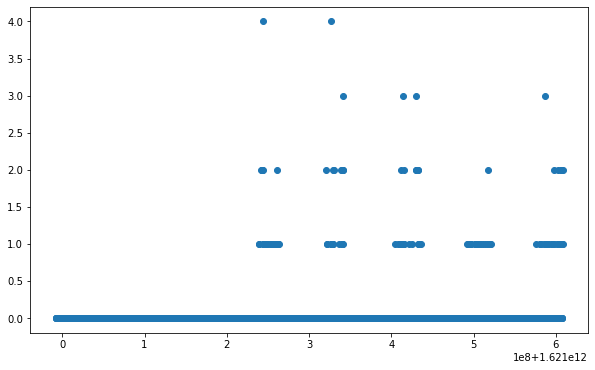

791720247


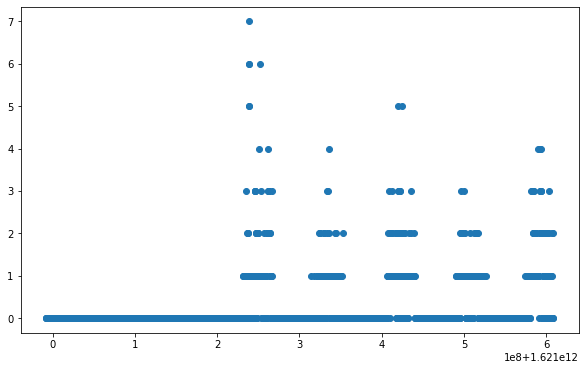

791720245


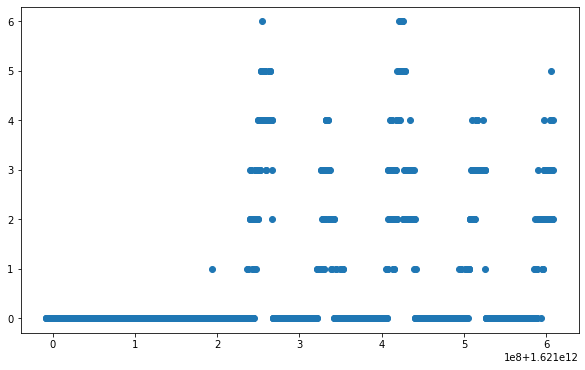

791720243


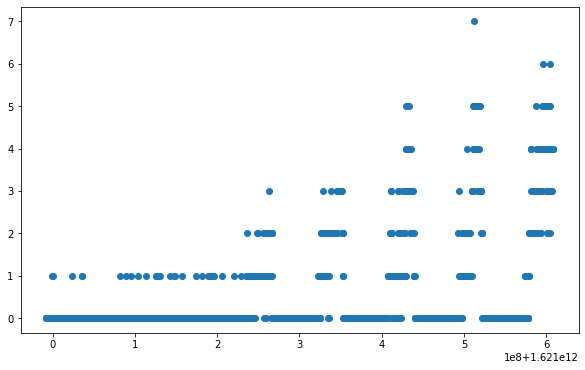

791720255


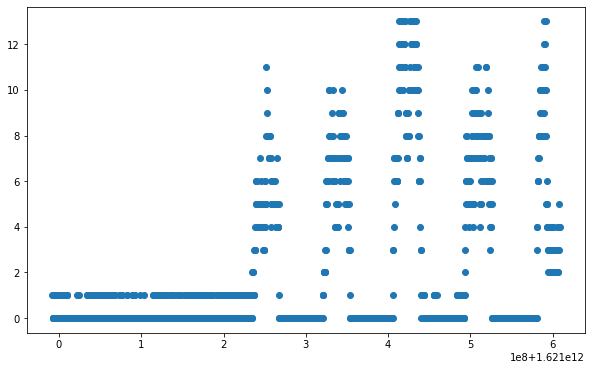

791720205


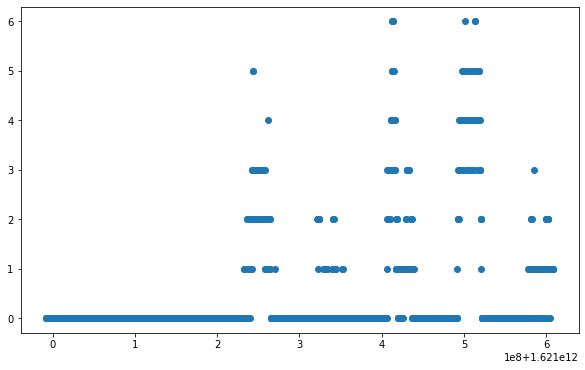

791720253


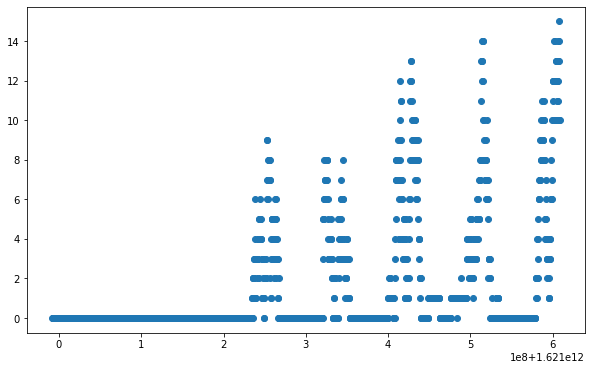

791720251


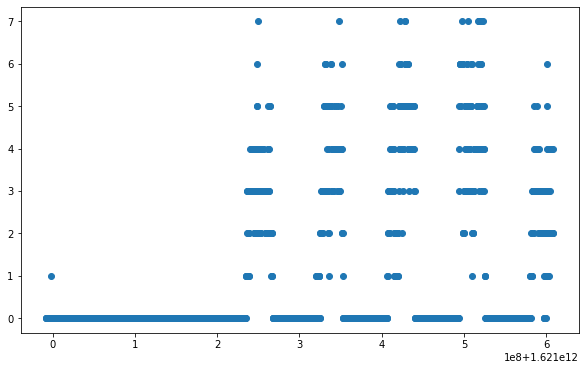

791720231


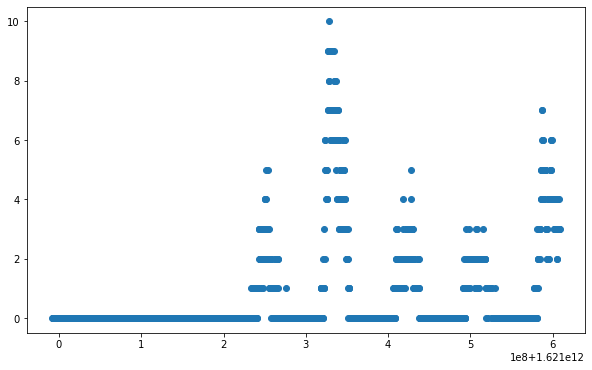

791720227


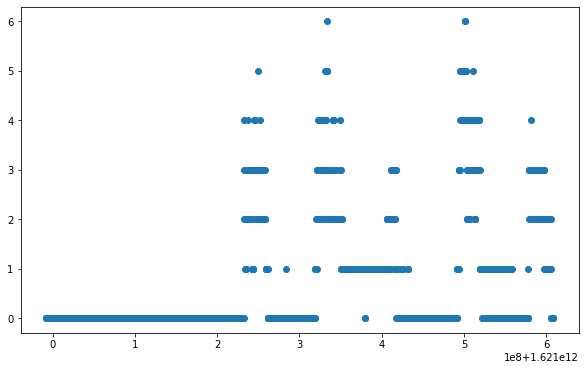

791720225


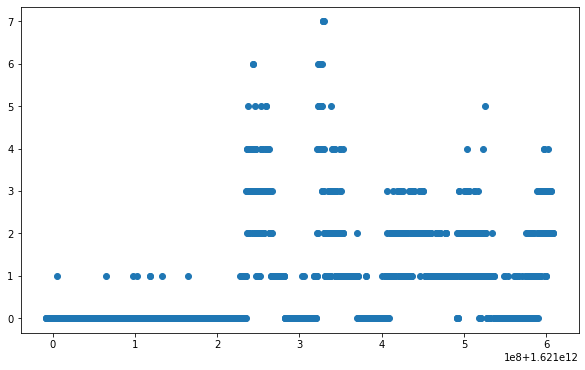

791720239


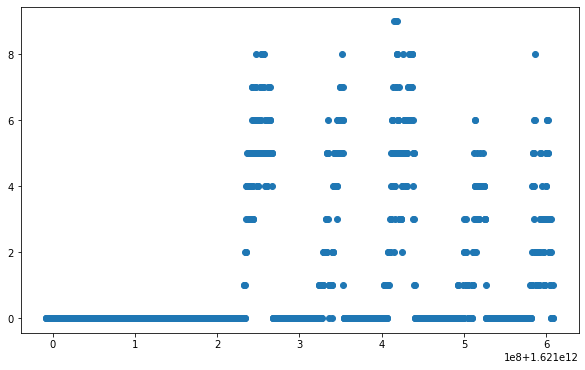

791720461


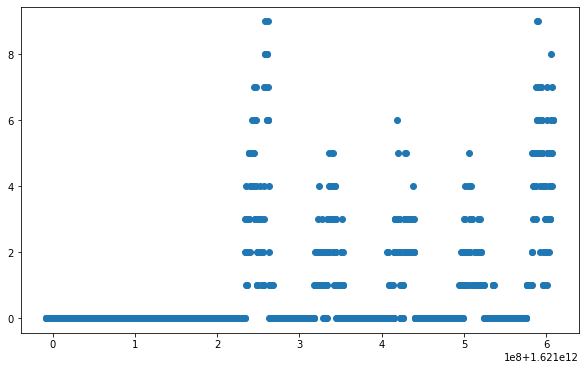

791720463


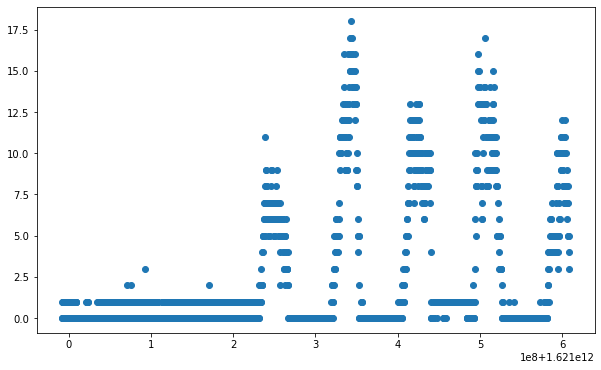

791720235


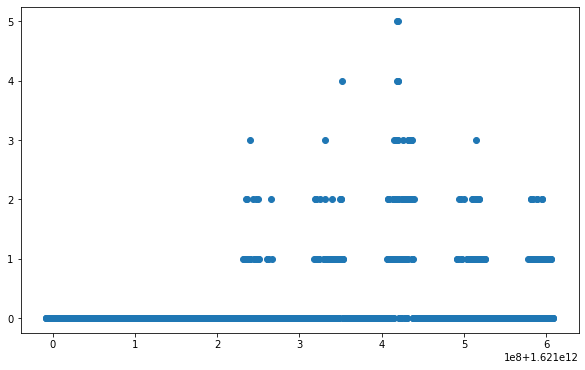

791720217


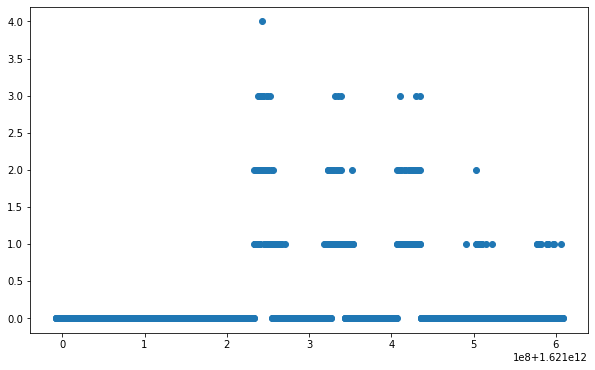

791720467


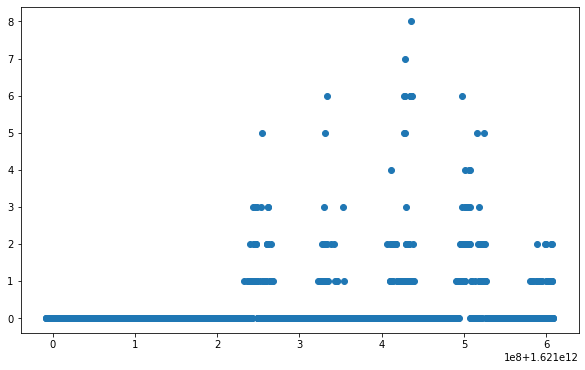

791720209


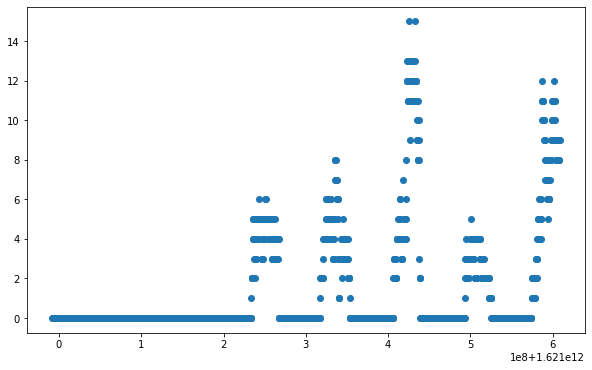

791720465


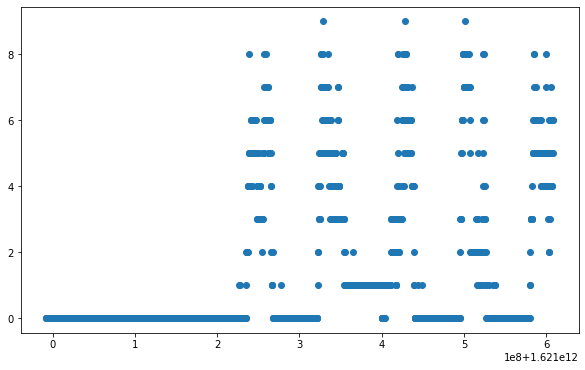

791720223


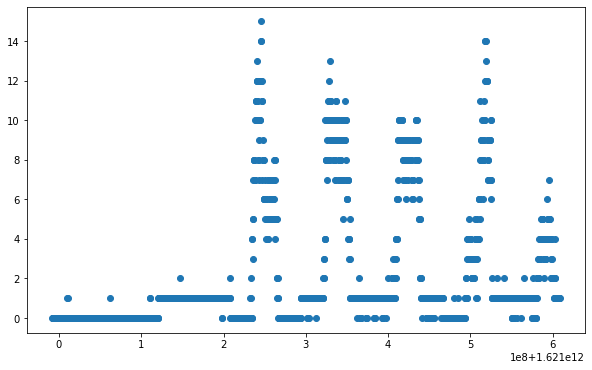

791720219


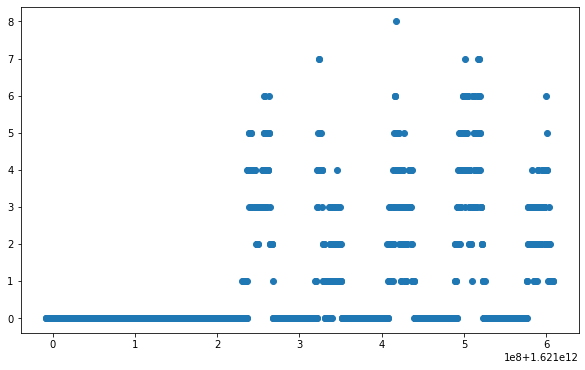

4555642175


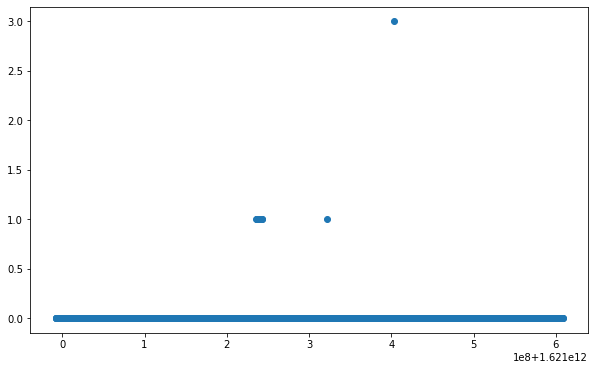

791720455


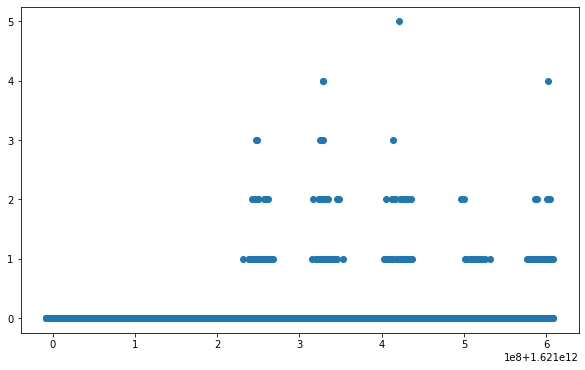

791720207


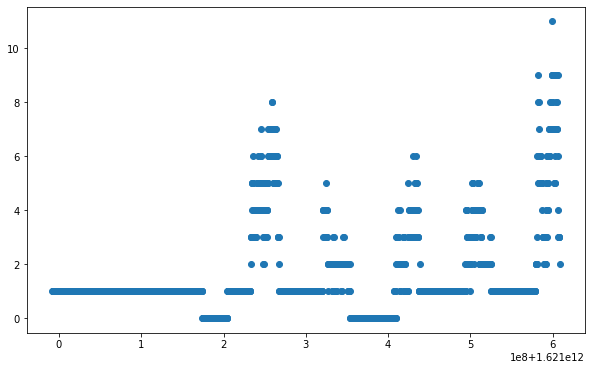

791720197


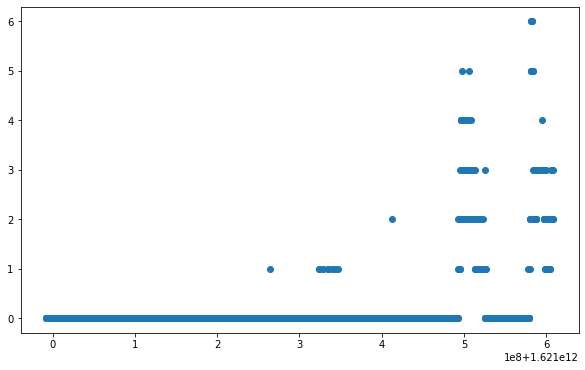

791720453


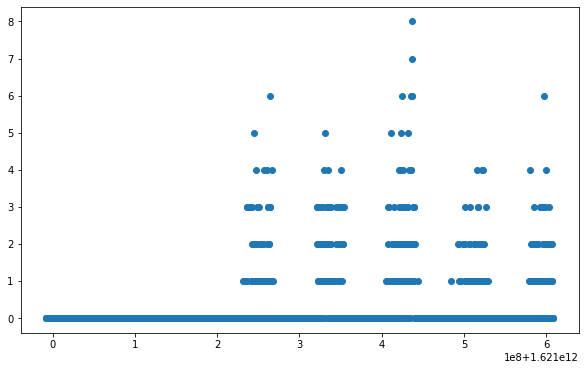

791720195


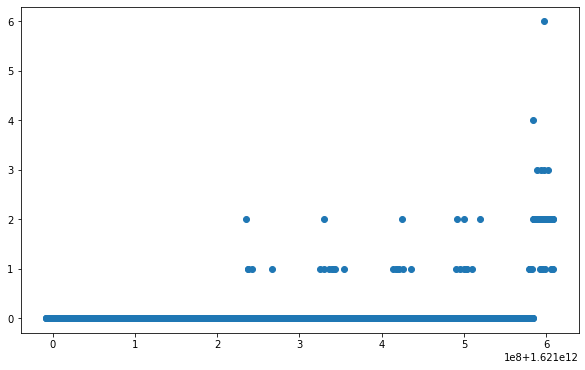

791720451


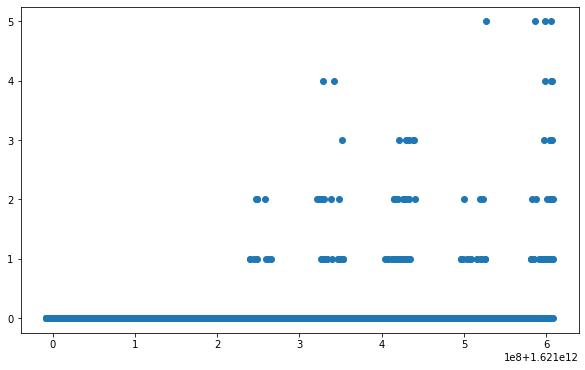

791720193


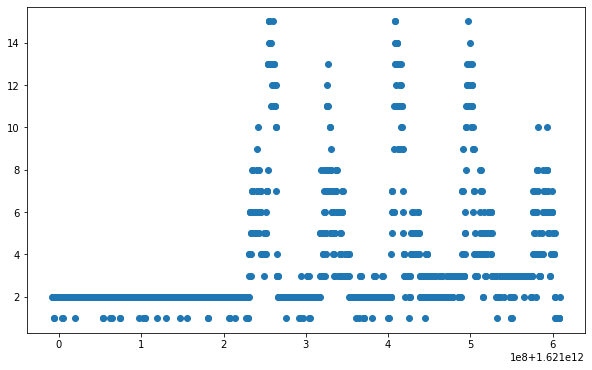

791720449


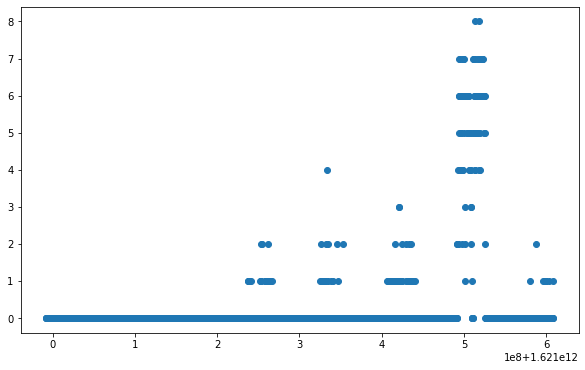

791720237


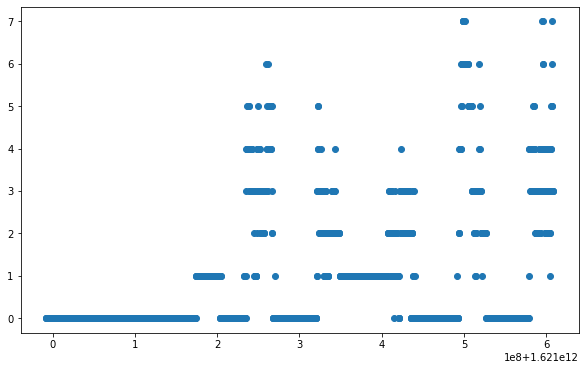

791720233


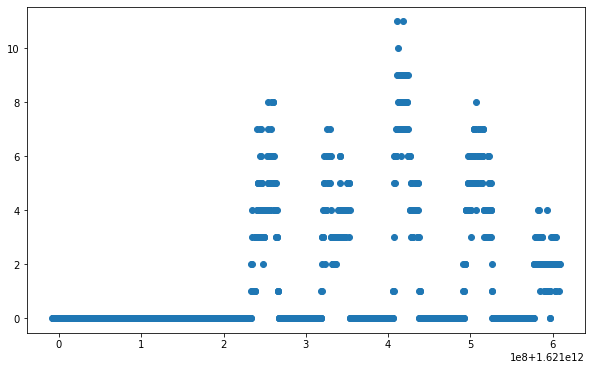

791720341


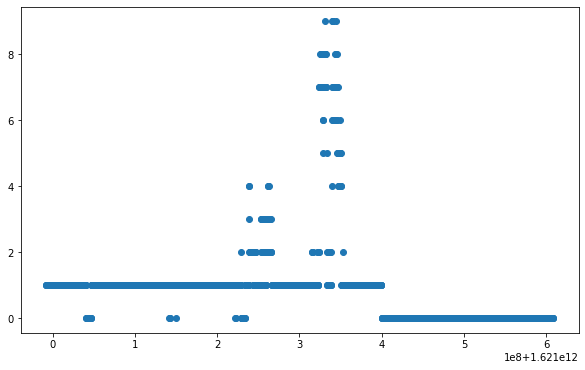

791720289


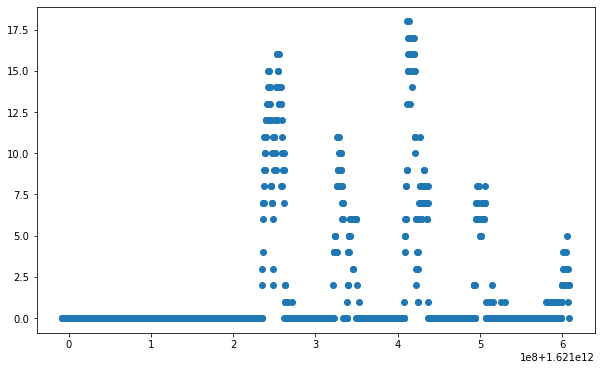

791720315


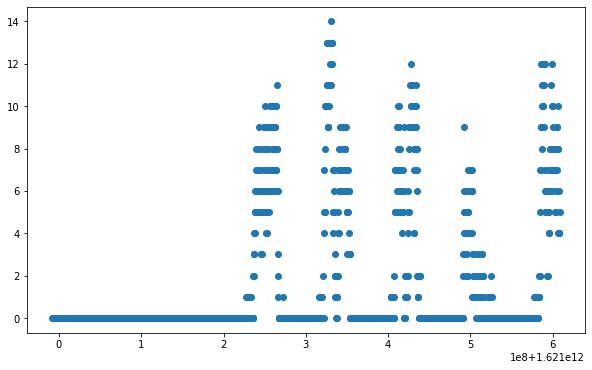

13507694223


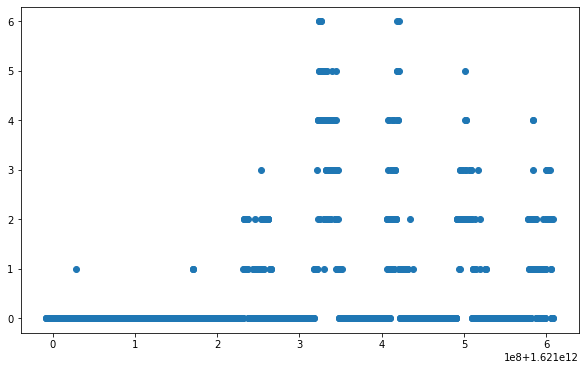

791720313


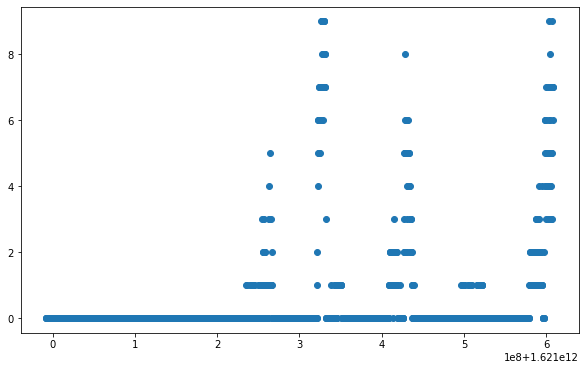

791720295


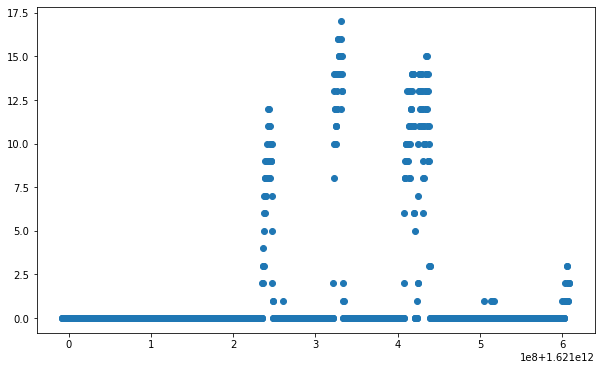

791720293


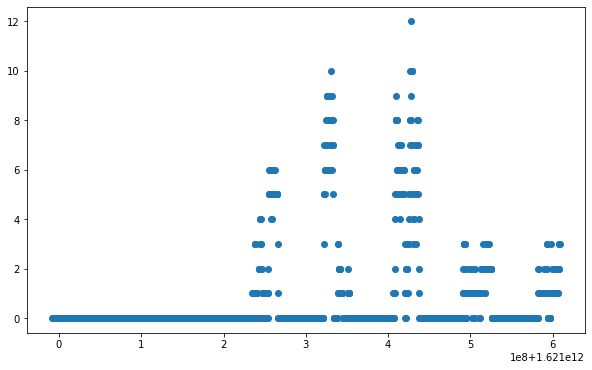

1297622385


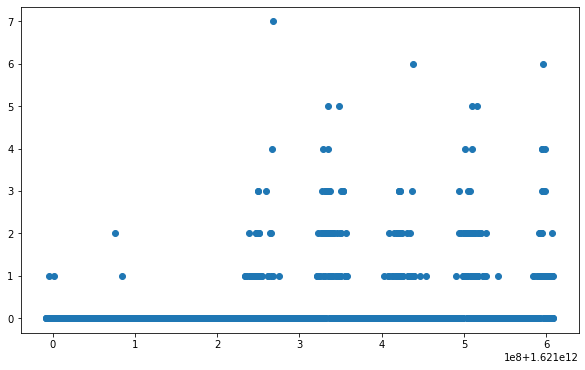

13017372381


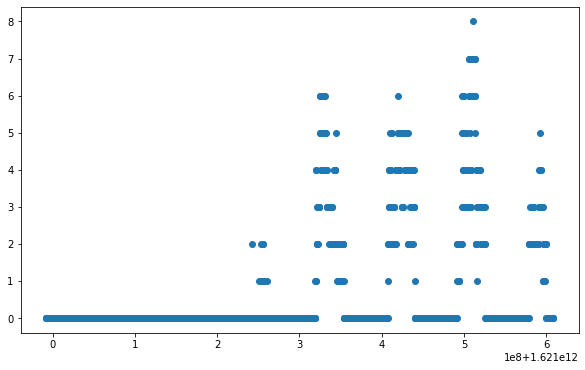

791720319


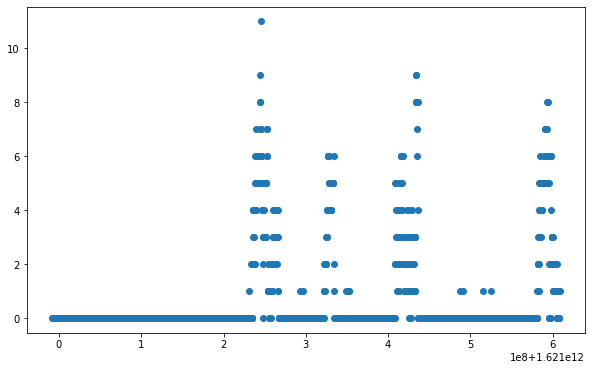

791720303


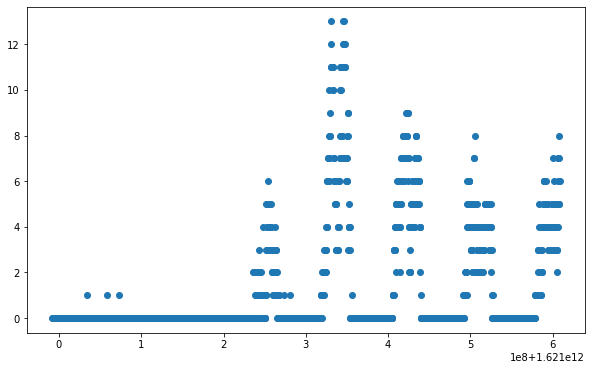

791720301


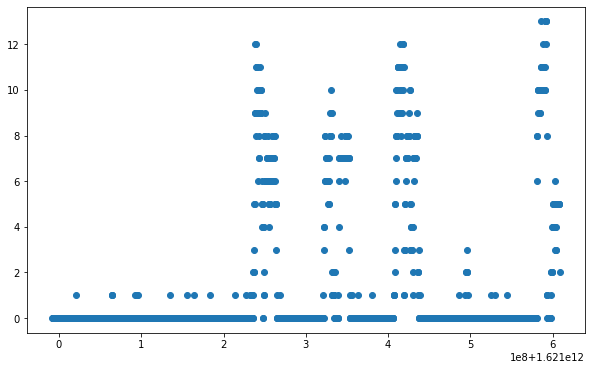

791720299


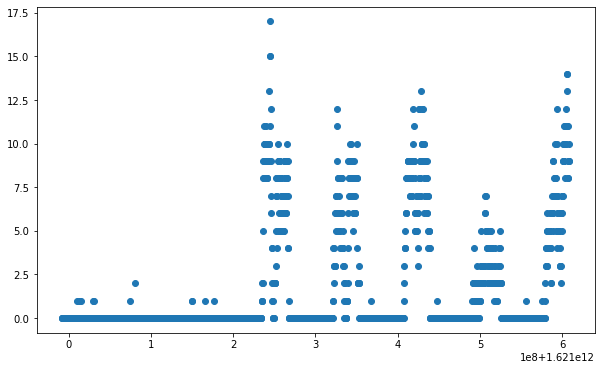

791720297


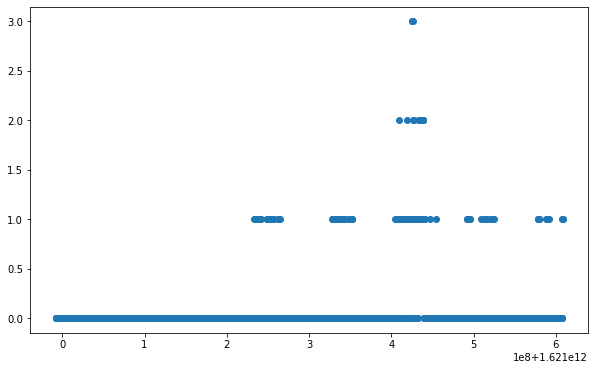

13017372373


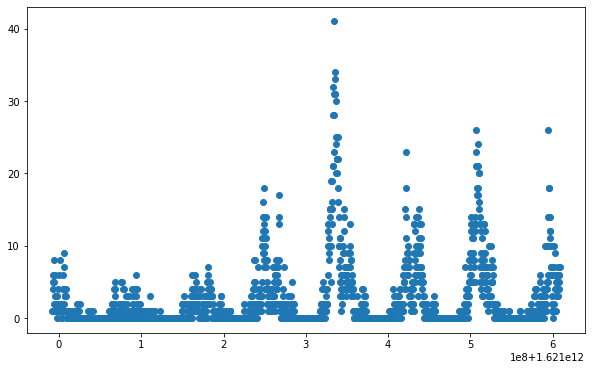

791720343


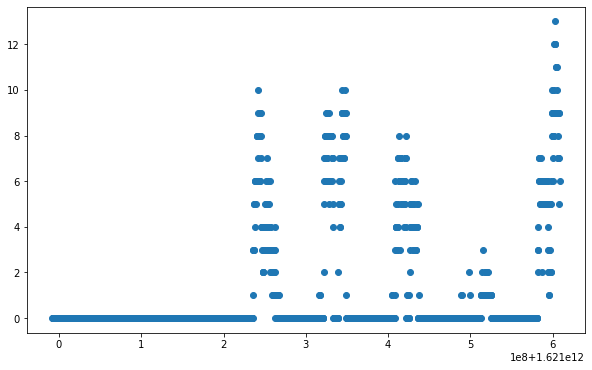

791720317


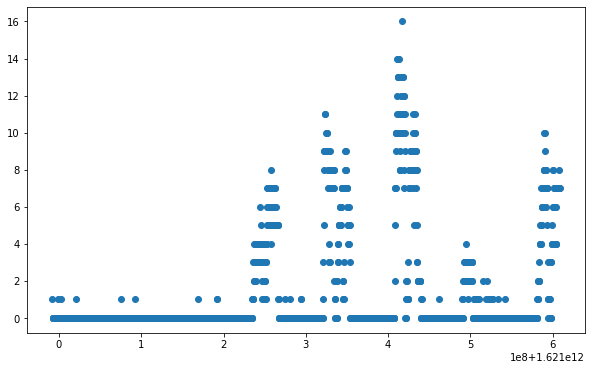

791720305


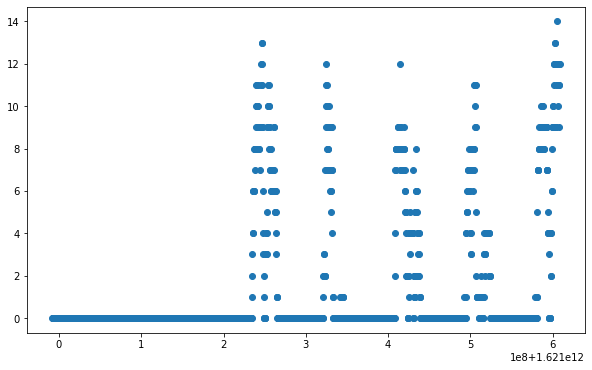

791720279


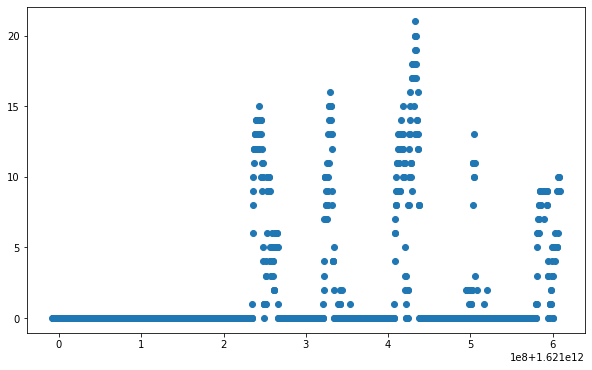

791720257


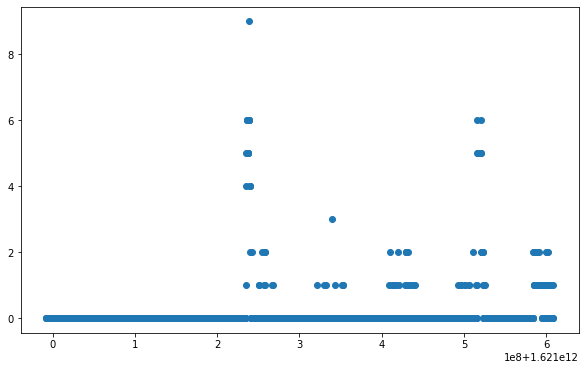

791720275


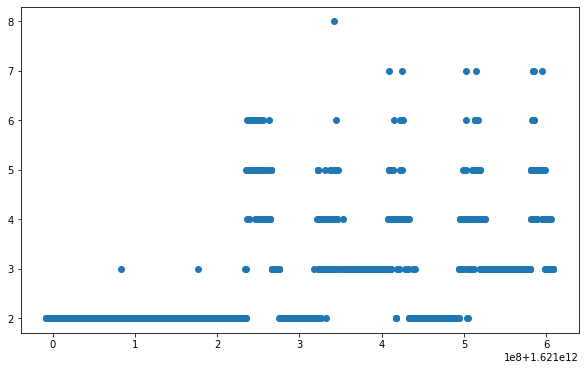

791720273


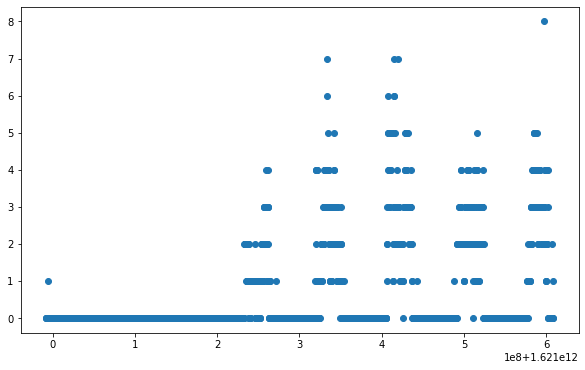

791720287


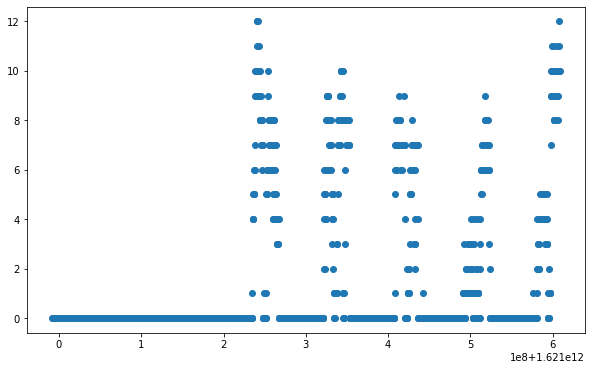

791720263


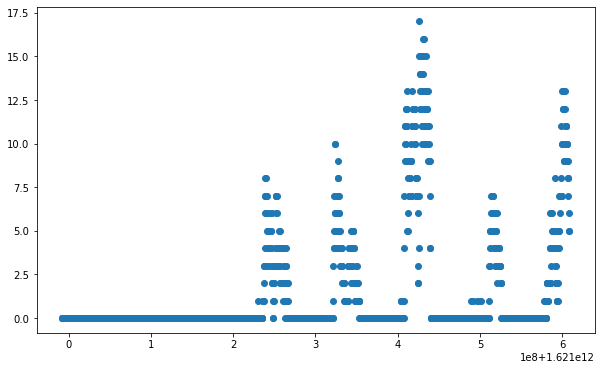

791720261


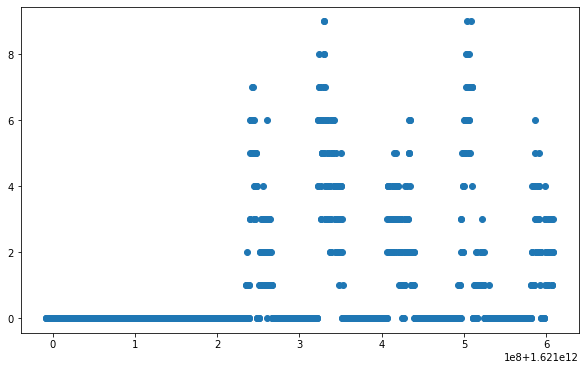

791720259


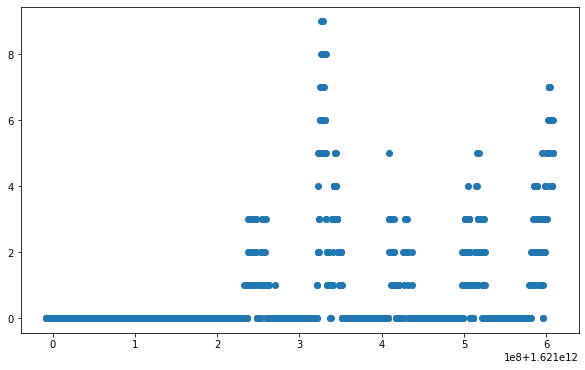

791720271


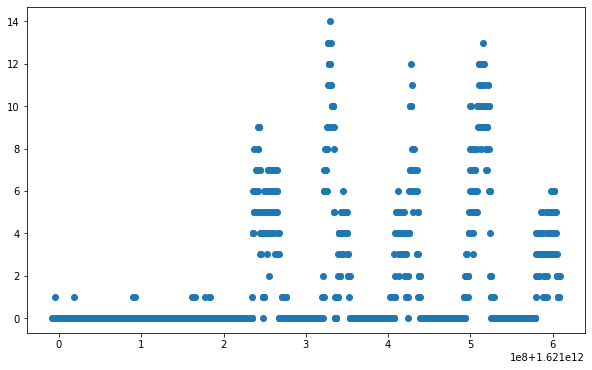

791720307


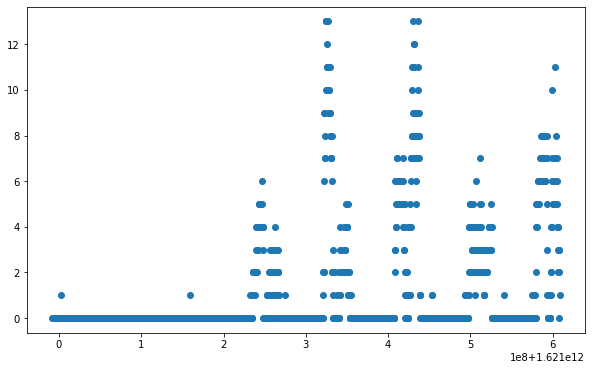

791720269


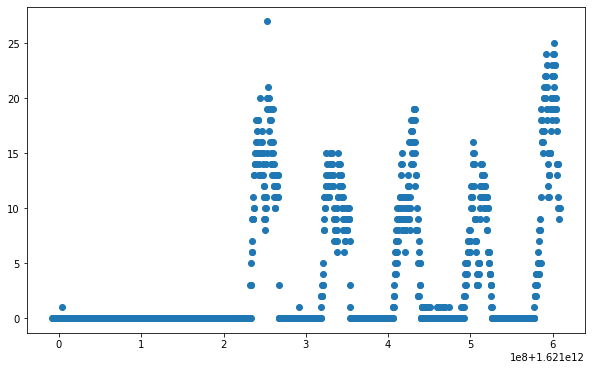

791720267


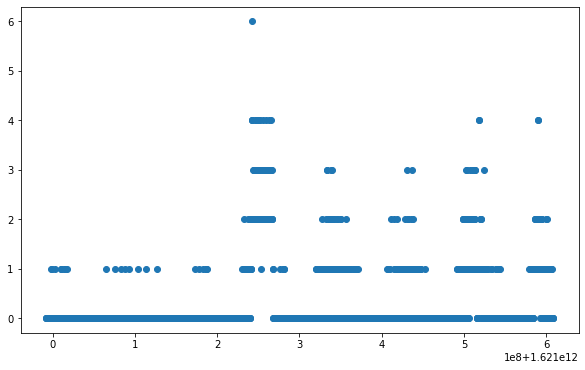

791720265


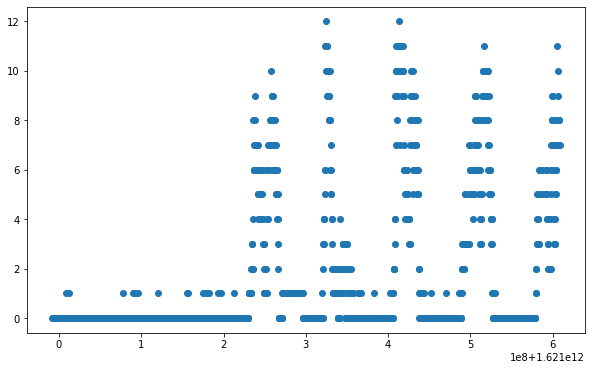

791720311


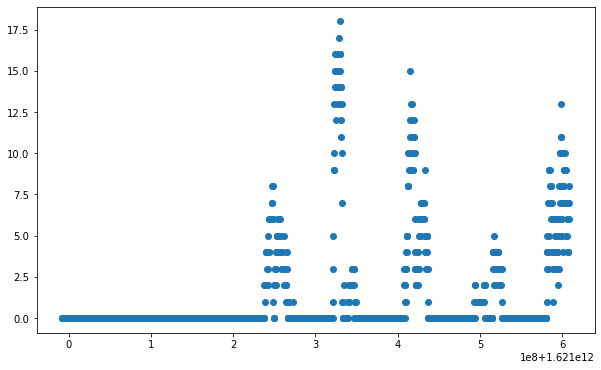

6945655720


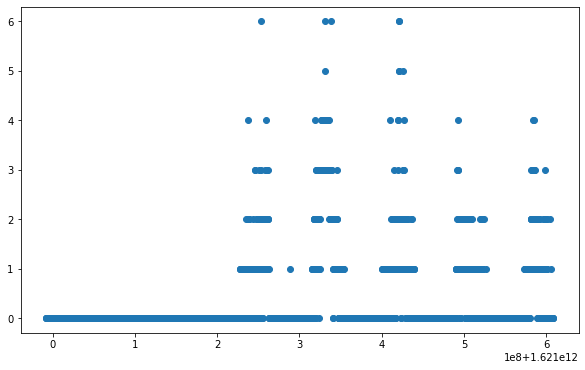

791720309


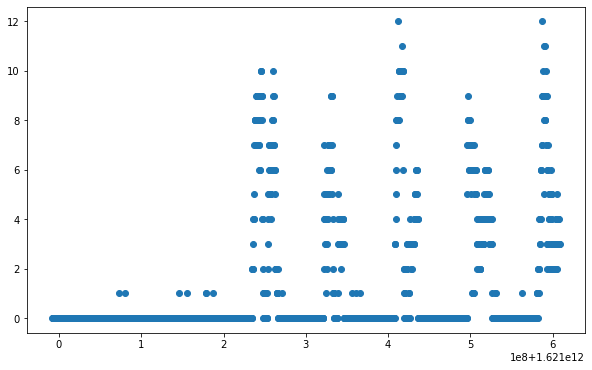

8380855497


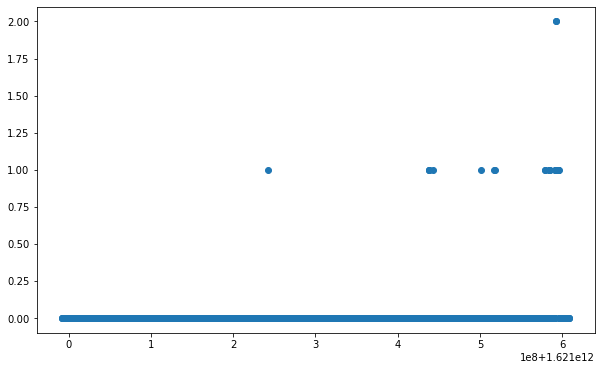

In [7]:
for point in IO_wifi_points.index:
    plt.figure(figsize=(10, 6))
    print(point)
    point_data = IO_all.loc[IO_all["id"] == point]
    plt.scatter(point_data["time_bucket"], point_data["clientCount"])
    plt.show()

## check if points can be in different buildings

I think so

## sum values for IO wifi points

               clientCount
time_bucket               
1620991800000           11
1620992100000           10
1620992400000           13
1620992700000           16
1620993000000           16
...                    ...
1621607400000          384
1621607700000          381
1621608000000          372
1621608300000          354
1621608600000          347

[2057 rows x 1 columns]


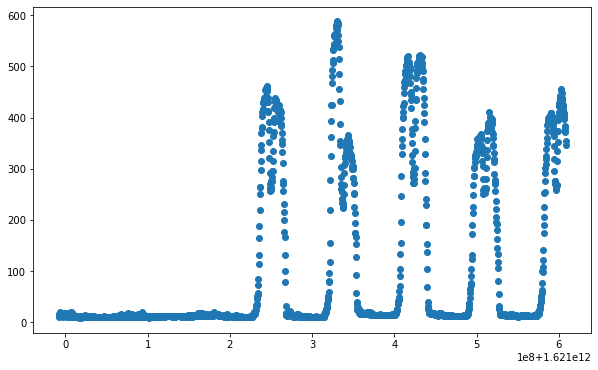

In [8]:
IO_bucket_sum = IO_all.groupby("time_bucket").sum().drop(columns=["timestamp", "id"])
print(IO_bucket_sum)
plt.figure(figsize=(10, 6))
plt.scatter(IO_bucket_sum.index, IO_bucket_sum["clientCount"])
plt.show()

In [9]:
print(IO_bucket_sum["clientCount"].sum())
print(IO_all["clientCount"].sum())
assert(IO_bucket_sum["clientCount"].sum() == IO_all["clientCount"].sum())

212662
212662


## find all buildings

In [14]:
list_of_buildings = all_data["building"].value_counts()
print(type(list_of_buildings))
print(list_of_buildings)

<class 'pandas.core.series.Series'>
23-CITG                              625320
22-TNW-TN                            592416
34-3ME                               464882
08-BK-City                           442227
58-TNW-Zuid                          327063
36-EWI LB_K t/m 3 & HB_K  t/m 2e     296208
32-OCP-IO                            294151
62-LR                                277675
28- WNI                              222156
21-BTUD                              183073
36-EWI-HB                            174817
31-TBM                               170671
50-TNW-RID                           166617
20-Aula                              160436
26-Bouwcampus                        133705
03-Science Center                    111078
66-Fellowship                        102850
33-Pulse                              94622
37-Sportcentrum                       88451
35-Drebbelweg                         76109
30-IKC_ISD-FMVG                       61710
36-ESP-Lab                            51

# add values per building

In [15]:
# total number of clientCount
print(all_data["clientCount"].sum())

3597531


In [23]:
# total number of rows is 5494090
print(list_of_buildings.values.sum())

5436495


In [28]:
sumall = 0
sumbucket = 0
for building in list_of_buildings.index:
    building_all = all_data.loc[all_data["building"] == building]
    building_bucket_sum = building_all.groupby("time_bucket").sum().drop(columns=["timestamp", "id"])
#     print(building)
#     print(building_bucket_sum)
#     plt.figure(figsize=(10, 6))
#     plt.scatter(building_bucket_sum.index, building_bucket_sum["clientCount"])
#     plt.show()
    sumall += building_all["clientCount"].sum()
    sumbucket += building_bucket_sum["clientCount"].sum()
    assert sumall == sumbucket
    print(building, sumall, sumbucket)
print(sumall)
print(sumbucket)

23-CITG 306197 306197
22-TNW-TN 682563 682563
34-3ME 1145511 1145511
08-BK-City 1497646 1497646
58-TNW-Zuid 1830373 1830373
36-EWI LB_K t/m 3 & HB_K  t/m 2e  1993549 1993549
32-OCP-IO 2206211 2206211
62-LR 2323487 2323487
28- WNI 2377954 2377954
21-BTUD 2602365 2602365
36-EWI-HB 2613628 2613628
31-TBM 2689696 2689696
50-TNW-RID 2798594 2798594
20-Aula 2839668 2839668
26-Bouwcampus 2913487 2913487
03-Science Center 2984048 2984048
66-Fellowship 3046216 3046216
33-Pulse 3153908 3153908
37-Sportcentrum 3200868 3200868
35-Drebbelweg 3240218 3240218
30-IKC_ISD-FMVG 3356127 3356127
36-ESP-Lab 3372564 3372564
38-Cultureel Centrum 3379611 3379611
64-HSL 3394121 3394121
61-Vliegtuighal 3422776 3422776
30-O S 3431557 3431557
25-GreenVillage 3480098 3480098
46-P E lab 3496073 3496073
32a- Learninglab 3497167 3497167
45-LSL 3519218 3519218
60-LMS 3528873 3528873
63-Simona 3534296 3534296
05-TNW-BIO 3540806 3540806
VLL-LAB(TNO) 3561590 3561590
43-EGM 3564181 3564181
Katalyse Labaratorium 3572227 35